In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL2FuZHJldy9HaXRIdWIvc2l0ZXMvdmlydHVlbGxlYWthZGVtaWUuZ2l0aHViLmlvL3Bvc3RzL3BvbGFycy1wbG90bmluZQ=='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/opt/homebrew/Cellar/python@3.13/3.13.4/Frameworks/Python.framework/Versions/3.13/lib/python3.13/importlib/_bootstrap.py": 1748964864.0, "/opt/homebrew/Cellar/python@3.13/3.13.4/Frameworks/Python.framework/Versions/3.13/lib/python3.13/importlib/_bootstrap_external.py": 1748964864.0, "/opt/homebrew/Cellar/python@3.13/3.13.4/Frameworks/Python.framework/Versions/3.13/lib/python3.13/zipimport.py": 1748964864.0, "/opt/homebrew/Cellar/python@3.13/3.13.4/Frameworks/Python.framework/Versions/3.13/lib/python3.13/codecs.py": 1748964864.0, "/opt/homebrew/Cellar/python@3.13/3.13.4/Frameworks/Python.framework/Versions/3.13/lib/python3.13/encodings/aliases.py": 1748964864.0, "/opt/homebrew/Cellar/python@3.13/3.13.4/Frameworks/Python.framework/Versions/3.13/lib/python3.13/encodings/__init__.py": 1748964864.0, "/opt/homebrew/Cellar/python@3.13/3.13.4/Frameworks/Python.framework/Versions/3.13/lib/python3.13/encodings/utf_8.py": 1748964864.0, "/opt/homebrew/Cellar/python@3.13/3.13.4/Frameworks/Python.

In [2]:
#| warning: false

import polars as pl
import numpy as np
from plotnine import (
    ggplot, aes, geom_point, geom_smooth, geom_violin, geom_boxplot, geom_col, 
    geom_tile, geom_text, stat_summary, facet_wrap,
    scale_color_brewer, scale_fill_brewer, scale_color_manual, scale_fill_manual,
    scale_color_gradient, scale_fill_gradient, scale_color_gradient2, 
    scale_fill_gradient2, scale_size_continuous, scale_alpha_continuous,
    labs, theme_minimal, theme, element_text, element_rect, element_line,
    element_blank, guide_legend, coord_flip, xlim, ylim, position_dodge
)
import plotnine.options
from datetime import datetime, timedelta
import warnings

# Configure plotnine for better output
plotnine.options.figure_size = (10, 6)
plotnine.options.dpi = 100
warnings.filterwarnings('ignore')

# Ensure proper display in Quarto
from IPython.display import display
import matplotlib
matplotlib.use('Agg')  # Use non-interactive backend

# Display Polars version and configuration
print(f"Polars version: {pl.__version__}")
print(f"Available threads: {pl.thread_pool_size()}")

Polars version: 1.30.0
Available threads: 14


In [3]:
# Create a comprehensive educational dataset using Polars
# This demonstrates Polars' syntax while creating realistic data

np.random.seed(42)

# Generate base student data
n_students = 5000
n_courses = 8
n_semesters = 6

# Create students DataFrame
students_df = pl.DataFrame({
    "student_id": range(1, n_students + 1),
    "age": np.random.normal(22, 2, n_students).round().astype(int),
    "program": np.random.choice(["Computer Science", "Mathematics", "Physics", "Statistics"], n_students),
    "entry_year": np.random.choice([2020, 2021, 2022, 2023], n_students),
    "study_mode": np.random.choice(["Full-time", "Part-time"], n_students, p=[0.8, 0.2])
}).with_columns([
    # Add realistic constraints using Polars expressions
    pl.col("age").clip(18, 28).alias("age"),
    # Generate GPA with program-based bias
    pl.when(pl.col("program") == "Computer Science")
      .then(np.random.normal(3.2, 0.5, n_students))
      .when(pl.col("program") == "Mathematics") 
      .then(np.random.normal(3.4, 0.4, n_students))
      .when(pl.col("program") == "Physics")
      .then(np.random.normal(3.1, 0.6, n_students))
      .otherwise(np.random.normal(3.3, 0.5, n_students))
      .clip(1.0, 4.0)
      .round(2)
      .alias("gpa")
])

print("Students DataFrame shape:", students_df.shape)
students_df.head()

Students DataFrame shape: (5000, 6)


shape: (5, 6)
┌────────────┬─────┬──────────────────┬────────────┬────────────┬──────┐
│ student_id ┆ age ┆ program          ┆ entry_year ┆ study_mode ┆ gpa  │
│ ---        ┆ --- ┆ ---              ┆ ---        ┆ ---        ┆ ---  │
│ i64        ┆ i64 ┆ str              ┆ i64        ┆ str        ┆ f64  │
╞════════════╪═════╪══════════════════╪════════════╪════════════╪══════╡
│ 1          ┆ 23  ┆ Statistics       ┆ 2022       ┆ Full-time  ┆ 2.43 │
│ 2          ┆ 22  ┆ Computer Science ┆ 2020       ┆ Full-time  ┆ 2.54 │
│ 3          ┆ 23  ┆ Statistics       ┆ 2020       ┆ Part-time  ┆ 2.88 │
│ 4          ┆ 25  ┆ Mathematics      ┆ 2023       ┆ Full-time  ┆ 3.58 │
│ 5          ┆ 22  ┆ Statistics       ┆ 2021       ┆ Full-time  ┆ 3.94 │
└────────────┴─────┴──────────────────┴────────────┴────────────┴──────┘

In [4]:
# Create course performance data using a simple approach
courses = ["Calculus", "Linear Algebra", "Statistics", "Programming", 
          "Data Structures", "Machine Learning", "Research Methods", "Thesis"]

# Create performance data manually to avoid cross join issues
np.random.seed(42)
performance_records = []

# Get student data as list for iteration
student_records = students_df.to_dicts()

for student in student_records:
    for i, course in enumerate(courses):
        # Course difficulty multipliers
        if course in ["Machine Learning", "Thesis"]:
            base_multiplier = 20
            noise_factor = 1.6
        elif course in ["Calculus", "Linear Algebra"]:
            base_multiplier = 22
            noise_factor = 2.0
        else:
            base_multiplier = 21
            noise_factor = 1.2
        
        # Generate pseudo-random values based on student_id and course
        seed_val = (student["student_id"] * 7 + i * 13) % 1000
        
        # Calculate score
        base_score = student["gpa"] * base_multiplier
        score_variation = (seed_val / 100.0 - 5.0) * noise_factor
        score = max(0, min(100, round(base_score + score_variation, 1)))
        
        # Study hours based on course type
        if course in ["Programming", "Data Structures"]:
            study_hours = 8 + (seed_val % 100) / 10.0
        elif course == "Thesis":
            study_hours = 15 + (seed_val % 150) / 10.0
        else:
            study_hours = 5 + (seed_val % 80) / 10.0
        
        # Attendance
        attendance = max(50, min(100, round(85 + (seed_val % 50) / 5.0 - 5.0, 1)))
        
        performance_records.append({
            "student_id": student["student_id"],
            "program": student["program"],
            "gpa": student["gpa"],
            "course": course,
            "semester": i + 1,
            "score": score,
            "study_hours": round(study_hours, 1),
            "attendance": attendance
        })

# Create Polars DataFrame from the records
performance_df = pl.DataFrame(performance_records)

print("Performance DataFrame shape:", performance_df.shape)
performance_df.head()

Performance DataFrame shape: (40000, 8)


shape: (5, 8)
┌────────────┬────────────┬──────┬─────────────────┬──────────┬───────┬─────────────┬────────────┐
│ student_id ┆ program    ┆ gpa  ┆ course          ┆ semester ┆ score ┆ study_hours ┆ attendance │
│ ---        ┆ ---        ┆ ---  ┆ ---             ┆ ---      ┆ ---   ┆ ---         ┆ ---        │
│ i64        ┆ str        ┆ f64  ┆ str             ┆ i64      ┆ f64   ┆ f64         ┆ f64        │
╞════════════╪════════════╪══════╪═════════════════╪══════════╪═══════╪═════════════╪════════════╡
│ 1          ┆ Statistics ┆ 2.43 ┆ Calculus        ┆ 1        ┆ 43.6  ┆ 5.7         ┆ 81.4       │
│ 1          ┆ Statistics ┆ 2.43 ┆ Linear Algebra  ┆ 2        ┆ 43.9  ┆ 7.0         ┆ 84.0       │
│ 1          ┆ Statistics ┆ 2.43 ┆ Statistics      ┆ 3        ┆ 45.4  ┆ 8.3         ┆ 86.6       │
│ 1          ┆ Statistics ┆ 2.43 ┆ Programming     ┆ 4        ┆ 45.6  ┆ 12.6        ┆ 89.2       │
│ 1          ┆ Statistics ┆ 2.43 ┆ Data Structures ┆ 5        ┆ 45.7  ┆ 13.9        ┆ 81.8       │
└────────────┴────────────┴──────┴─────────────────┴──────────┴───────┴─────────────┴────────────┘

In [5]:
# Demonstrate Polars' lazy evaluation
lazy_query = (
    performance_df
    .lazy()  # Switch to lazy mode
    .filter(pl.col("score") >= 70)
    .group_by(["program", "course"])
    .agg([
        pl.col("score").mean().alias("avg_score"),
        pl.col("study_hours").mean().alias("avg_study_hours"),
        pl.col("attendance").mean().alias("avg_attendance"),
        pl.count().alias("n_students")
    ])
    .sort("avg_score", descending=True)
)

# Execute the lazy query
program_performance = lazy_query.collect()
print("Top performing program-course combinations:")
program_performance.head(10)

Top performing program-course combinations:


shape: (10, 6)
┌──────────────────┬────────────────┬───────────┬─────────────────┬────────────────┬────────────┐
│ program          ┆ course         ┆ avg_score ┆ avg_study_hours ┆ avg_attendance ┆ n_students │
│ ---              ┆ ---            ┆ ---       ┆ ---             ┆ ---            ┆ ---        │
│ str              ┆ str            ┆ f64       ┆ f64             ┆ f64            ┆ u32        │
╞══════════════════╪════════════════╪═══════════╪═════════════════╪════════════════╪════════════╡
│ Mathematics      ┆ Calculus       ┆ 80.371966 ┆ 8.828641        ┆ 84.946117      ┆ 824        │
│ Mathematics      ┆ Linear Algebra ┆ 80.352906 ┆ 8.866828        ┆ 84.859564      ┆ 826        │
│ Statistics       ┆ Calculus       ┆ 80.228754 ┆ 8.865864        ┆ 84.898867      ┆ 706        │
│ Statistics       ┆ Linear Algebra ┆ 80.203841 ┆ 8.831721        ┆ 84.912376      ┆ 703        │
│ Physics          ┆ Calculus       ┆ 79.930411 ┆ 9.084794        ┆ 85.010376      ┆ 559        │
│ Physics          ┆ Linear Algebra ┆ 79.864298 ┆ 8.949378        ┆ 84.705151      ┆ 563        │
│ Computer Science ┆ Linear Algebra ┆ 79.621408 ┆ 8.850733        ┆ 84.927273      ┆ 682        │
│ Computer Science ┆ Calculus       ┆ 79.557143 ┆ 8.905102        ┆ 85.037609      ┆ 686        │
│ Physics          ┆ Programming    ┆ 77.858796 ┆ 13.072222       ┆ 85.144444      ┆ 432        │
│ Physics          ┆ Statistics     ┆ 77.850229 ┆ 8.884404        ┆ 85.030275      ┆ 436        │
└──────────────────┴────────────────┴───────────┴─────────────────┴────────────────┴────────────┘

In [6]:
# Advanced Polars expressions and window functions
student_rankings = (
    performance_df
    .with_columns([
        # Calculate percentile rank within each course
        pl.col("score").rank(method="average").over("course").alias("course_rank"),
        
        # Calculate student average score
        pl.col("score").mean().over("student_id").alias("student_avg"),
        
        # Flag high performers (top 10% in course) - simplified calculation
        (pl.col("score").rank(method="average", descending=True).over("course") <= 
         (pl.col("score").count().over("course") * 0.1).cast(pl.Int64)).alias("top_performer")
    ])
    .filter(pl.col("semester") >= 4)  # Focus on advanced courses
)

print("Student rankings with advanced metrics:")
student_rankings.head()

Student rankings with advanced metrics:


shape: (5, 11)
┌────────────┬────────────┬──────┬────────────┬───┬────────────┬───────────┬───────────┬───────────┐
│ student_id ┆ program    ┆ gpa  ┆ course     ┆ … ┆ attendance ┆ course_ra ┆ student_a ┆ top_perfo │
│ ---        ┆ ---        ┆ ---  ┆ ---        ┆   ┆ ---        ┆ nk        ┆ vg        ┆ rmer      │
│ i64        ┆ str        ┆ f64  ┆ str        ┆   ┆ f64        ┆ ---       ┆ ---       ┆ ---       │
│            ┆            ┆      ┆            ┆   ┆            ┆ f64       ┆ f64       ┆ bool      │
╞════════════╪════════════╪══════╪════════════╪═══╪════════════╪═══════════╪═══════════╪═══════════╡
│ 1          ┆ Statistics ┆ 2.43 ┆ Programmin ┆ … ┆ 89.2       ┆ 137.0     ┆ 44.275    ┆ false     │
│            ┆            ┆      ┆ g          ┆   ┆            ┆           ┆           ┆           │
│ 1          ┆ Statistics ┆ 2.43 ┆ Data       ┆ … ┆ 81.8       ┆ 136.5     ┆ 44.275    ┆ false     │
│            ┆            ┆      ┆ Structures ┆   ┆            ┆           ┆           ┆           │
│ 1          ┆ Statistics ┆ 2.43 ┆ Machine    ┆ … ┆ 84.4       ┆ 115.0     ┆ 44.275    ┆ false     │
│            ┆            ┆      ┆ Learning   ┆   ┆            ┆           ┆           ┆           │
│ 1          ┆ Statistics ┆ 2.43 ┆ Research   ┆ … ┆ 87.0       ┆ 143.5     ┆ 44.275    ┆ false     │
│            ┆            ┆      ┆ Methods    ┆   ┆            ┆           ┆           ┆           │
│ 1          ┆ Statistics ┆ 2.43 ┆ Thesis     ┆ … ┆ 89.6       ┆ 124.0     ┆ 44.275    ┆ false     │
└────────────┴────────────┴──────┴────────────┴───┴────────────┴───────────┴───────────┴───────────┘

In [7]:
# Multi-level aggregations using Polars
program_analysis = (
    student_rankings
    .group_by("program")
    .agg([
        # Basic statistics
        pl.col("score").mean().alias("avg_score"),
        pl.col("score").std().alias("std_score"),
        pl.col("score").quantile(0.5).alias("median_score"),
        
        # Advanced metrics
        pl.col("top_performer").sum().alias("top_performers_count"),
        pl.col("top_performer").mean().alias("top_performer_rate"),
        
        # Study behavior
        pl.col("study_hours").mean().alias("avg_study_hours"),
        pl.col("attendance").mean().alias("avg_attendance"),
        
        # Count and range
        pl.count().alias("total_records"),
        (pl.col("score").max() - pl.col("score").min()).alias("score_range")
    ])
    .sort("avg_score", descending=True)
)

print("Comprehensive program analysis:")
program_analysis

Comprehensive program analysis:


shape: (4, 10)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ program   ┆ avg_score ┆ std_score ┆ median_sc ┆ … ┆ avg_study ┆ avg_atten ┆ total_rec ┆ score_ra │
│ ---       ┆ ---       ┆ ---       ┆ ore       ┆   ┆ _hours    ┆ dance     ┆ ords      ┆ nge      │
│ str       ┆ f64       ┆ f64       ┆ ---       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---      │
│           ┆           ┆           ┆ f64       ┆   ┆ f64       ┆ f64       ┆ u32       ┆ f64      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ Mathemati ┆ 70.218913 ┆ 8.735432  ┆ 70.4      ┆ … ┆ 13.215217 ┆ 84.922074 ┆ 5980      ┆ 50.5     │
│ cs        ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ Statistic ┆ 67.450602 ┆ 10.359923 ┆ 67.7      ┆ … ┆ 13.102892 ┆ 84.893012 ┆ 6225      ┆ 62.2     │
│ s         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ Computer  ┆ 65.771991 ┆ 10.61858  ┆ 66.0      ┆ … ┆ 13.151869 ┆ 84.879786 ┆ 6555      ┆ 62.8     │
│ Science   ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ Physics   ┆ 63.37617  ┆ 12.308192 ┆ 63.5      ┆ … ┆ 13.204647 ┆ 84.907051 ┆ 6240      ┆ 74.3     │
└───────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴──────────┘

In [8]:
# For correlation analysis, we'll use a simpler approach
# Calculate correlations using pandas (since plotnine uses pandas anyway)
import pandas as pd

correlation_results = []
for program in performance_df["program"].unique():
    program_data = performance_df.filter(pl.col("program") == program).to_pandas()
    
    score_study_corr = program_data["score"].corr(program_data["study_hours"])
    score_attendance_corr = program_data["score"].corr(program_data["attendance"])
    
    correlation_results.append({
        "program": program,
        "score_study_correlation": round(score_study_corr, 3),
        "score_attendance_correlation": round(score_attendance_corr, 3)
    })

correlation_df = pl.DataFrame(correlation_results)

# Combine with program analysis
final_program_analysis = program_analysis.join(correlation_df, on="program")
print("\nProgram analysis with correlations:")
final_program_analysis


Program analysis with correlations:


shape: (4, 12)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ program   ┆ avg_score ┆ std_score ┆ median_sc ┆ … ┆ total_rec ┆ score_ran ┆ score_stu ┆ score_at │
│ ---       ┆ ---       ┆ ---       ┆ ore       ┆   ┆ ords      ┆ ge        ┆ dy_correl ┆ tendance │
│ str       ┆ f64       ┆ f64       ┆ ---       ┆   ┆ ---       ┆ ---       ┆ ation     ┆ _correla │
│           ┆           ┆           ┆ f64       ┆   ┆ u32       ┆ f64       ┆ ---       ┆ tion     │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆ f64       ┆ ---      │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ f64      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ Mathemati ┆ 70.218913 ┆ 8.735432  ┆ 70.4      ┆ … ┆ 5980      ┆ 50.5      ┆ -0.113    ┆ 0.019    │
│ cs        ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ Computer  ┆ 65.771991 ┆ 10.61858  ┆ 66.0      ┆ … ┆ 6555      ┆ 62.8      ┆ -0.08     ┆ 0.025    │
│ Science   ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ Physics   ┆ 63.37617  ┆ 12.308192 ┆ 63.5      ┆ … ┆ 6240      ┆ 74.3      ┆ -0.063    ┆ 0.014    │
│ Statistic ┆ 67.450602 ┆ 10.359923 ┆ 67.7      ┆ … ┆ 6225      ┆ 62.2      ┆ -0.094    ┆ 0.021    │
│ s         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
└───────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴──────────┘

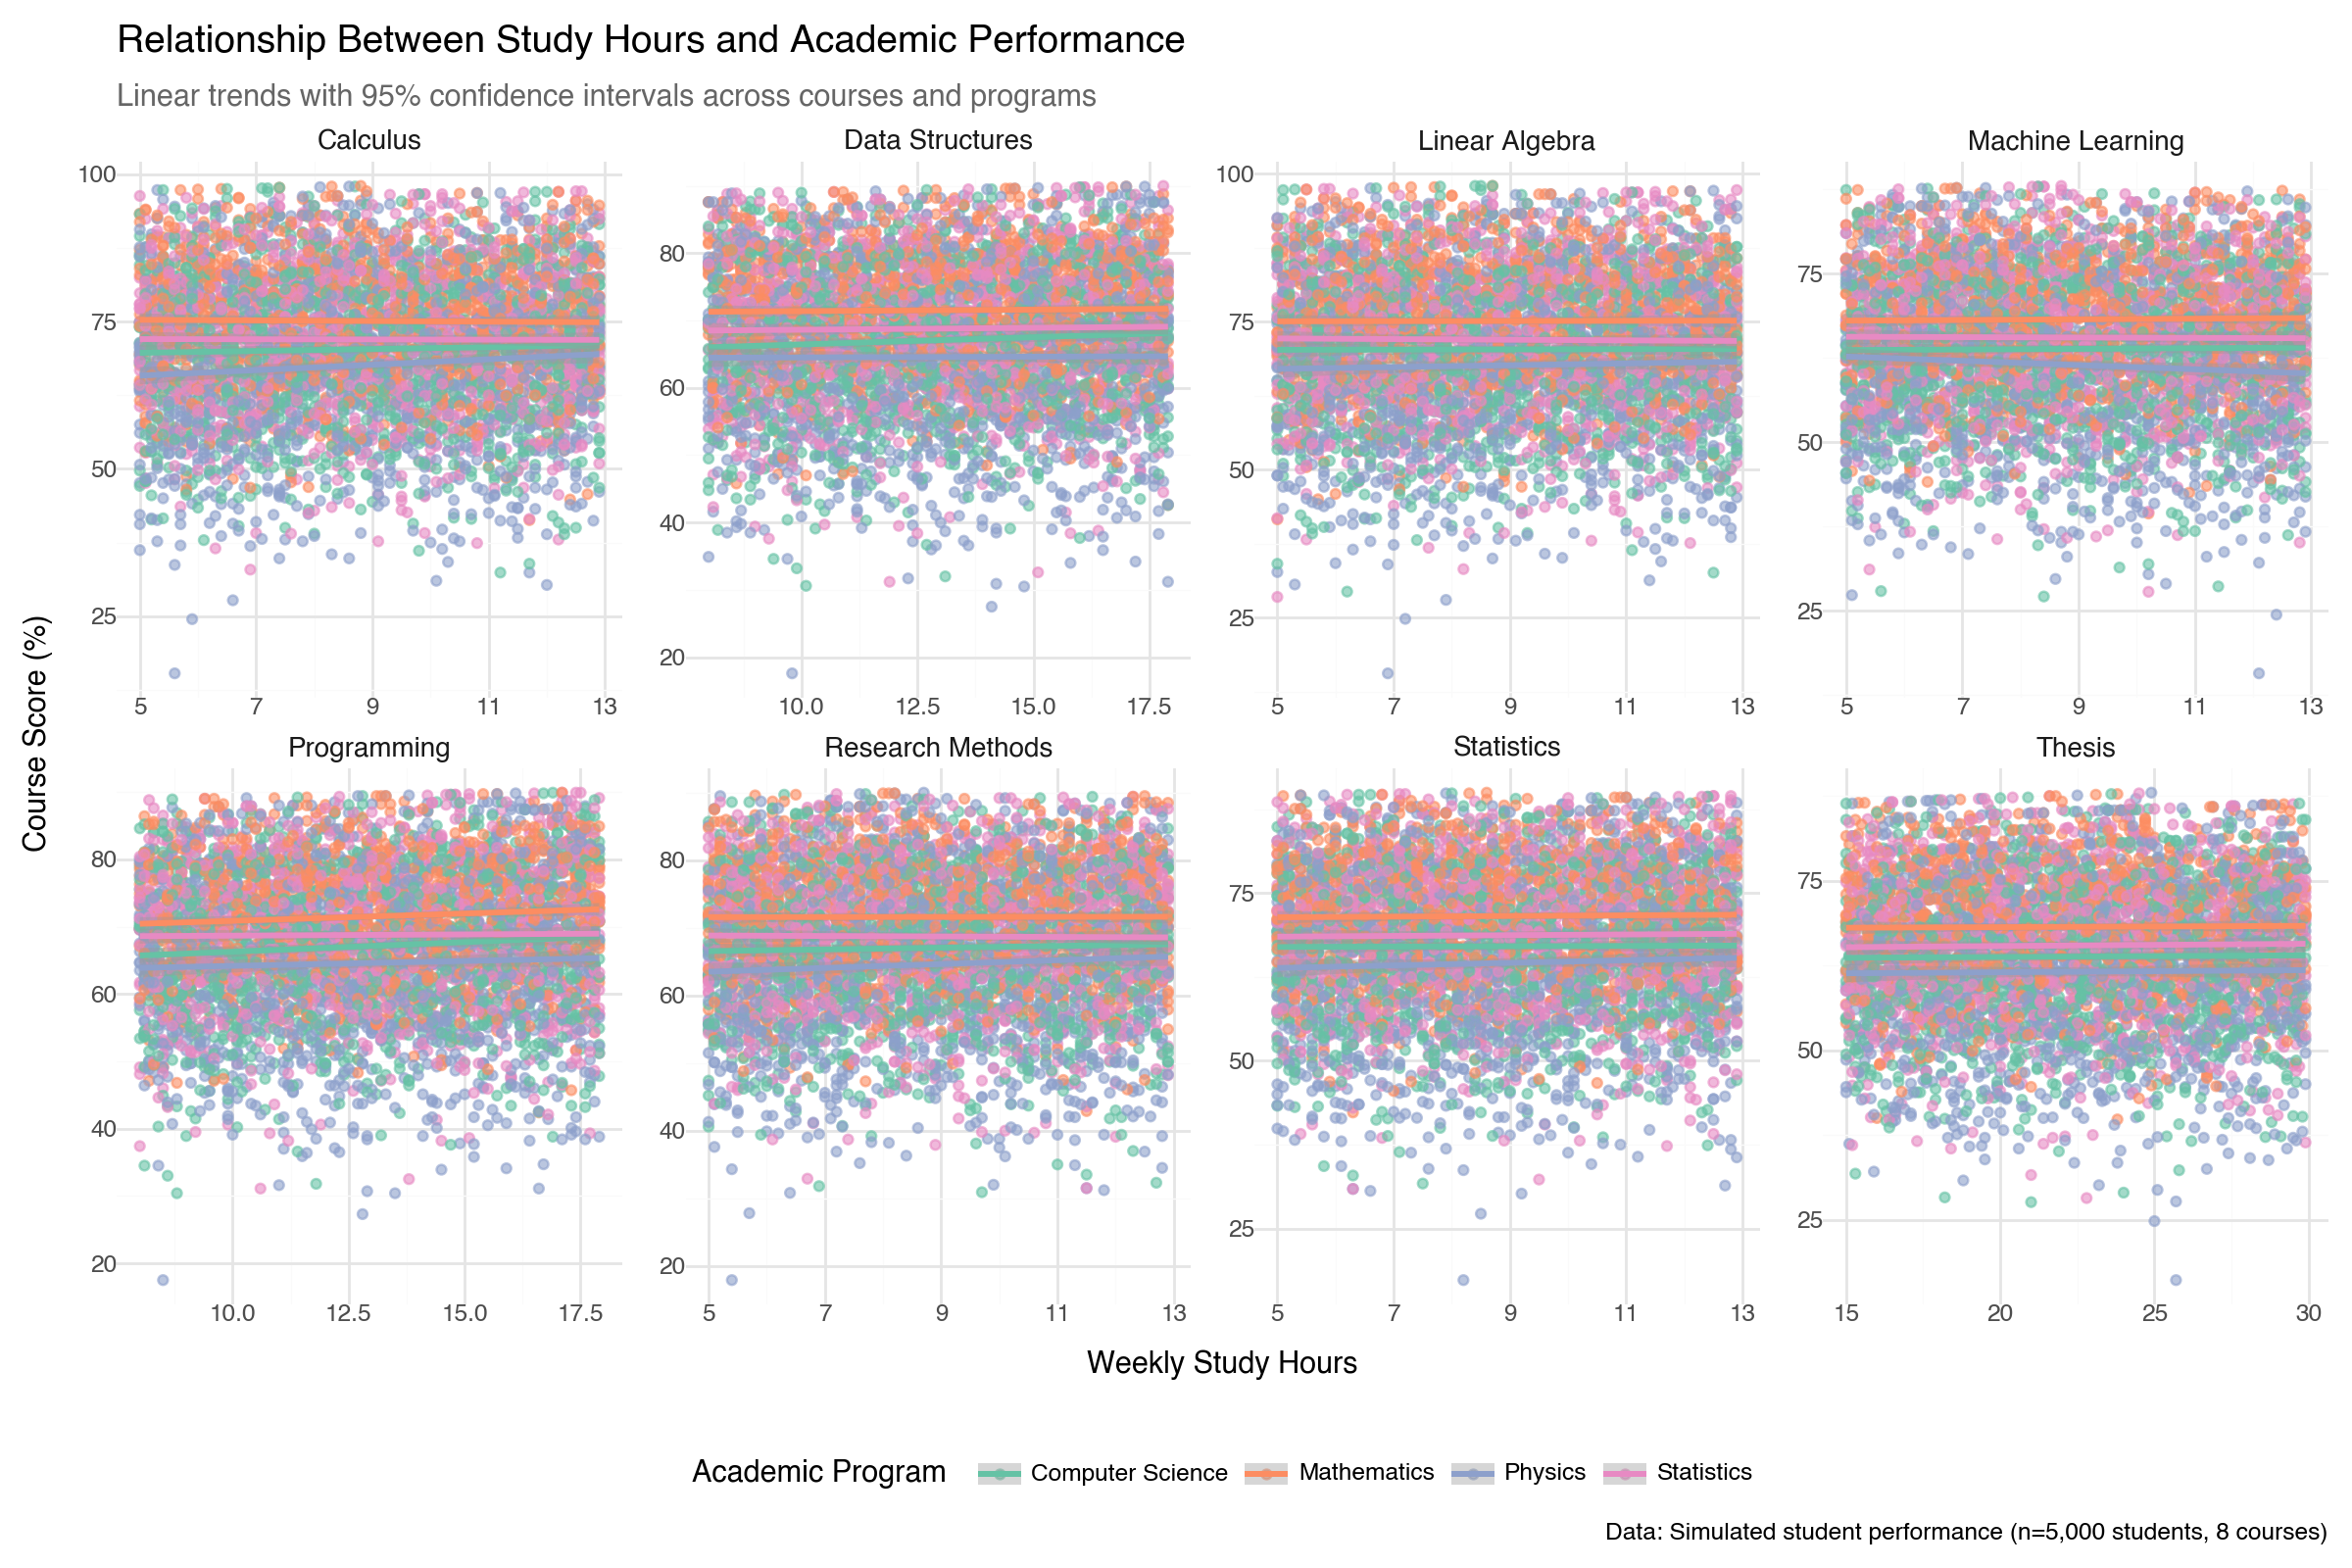

In [9]:
#| output: true

# Convert Polars to pandas for plotnine (plotnine expects pandas)
performance_pd = performance_df.to_pandas()

# Configure plotnine for this specific plot
import plotnine.options
plotnine.options.figure_size = (12, 8)

# Create a sophisticated multi-faceted visualization
p1 = (
    ggplot(performance_pd, aes(x="study_hours", y="score", color="program")) +
    geom_point(alpha=0.6, size=1.5) +
    geom_smooth(method="lm", se=True, size=1.2) +
    facet_wrap("course", ncol=4, scales="free") +
    scale_color_brewer(type="qual", palette="Set2") +
    labs(
        title="Relationship Between Study Hours and Academic Performance",
        subtitle="Linear trends with 95% confidence intervals across courses and programs",
        x="Weekly Study Hours",
        y="Course Score (%)",
        color="Academic Program",
        caption="Data: Simulated student performance (n=5,000 students, 8 courses)"
    ) +
    theme_minimal() +
    theme(
        plot_title=element_text(size=14, weight="bold"),
        plot_subtitle=element_text(size=11, color="#666666"),
        strip_text=element_text(size=10, weight="bold"),
        legend_position="bottom"
    )
)


# Display the plot
p1

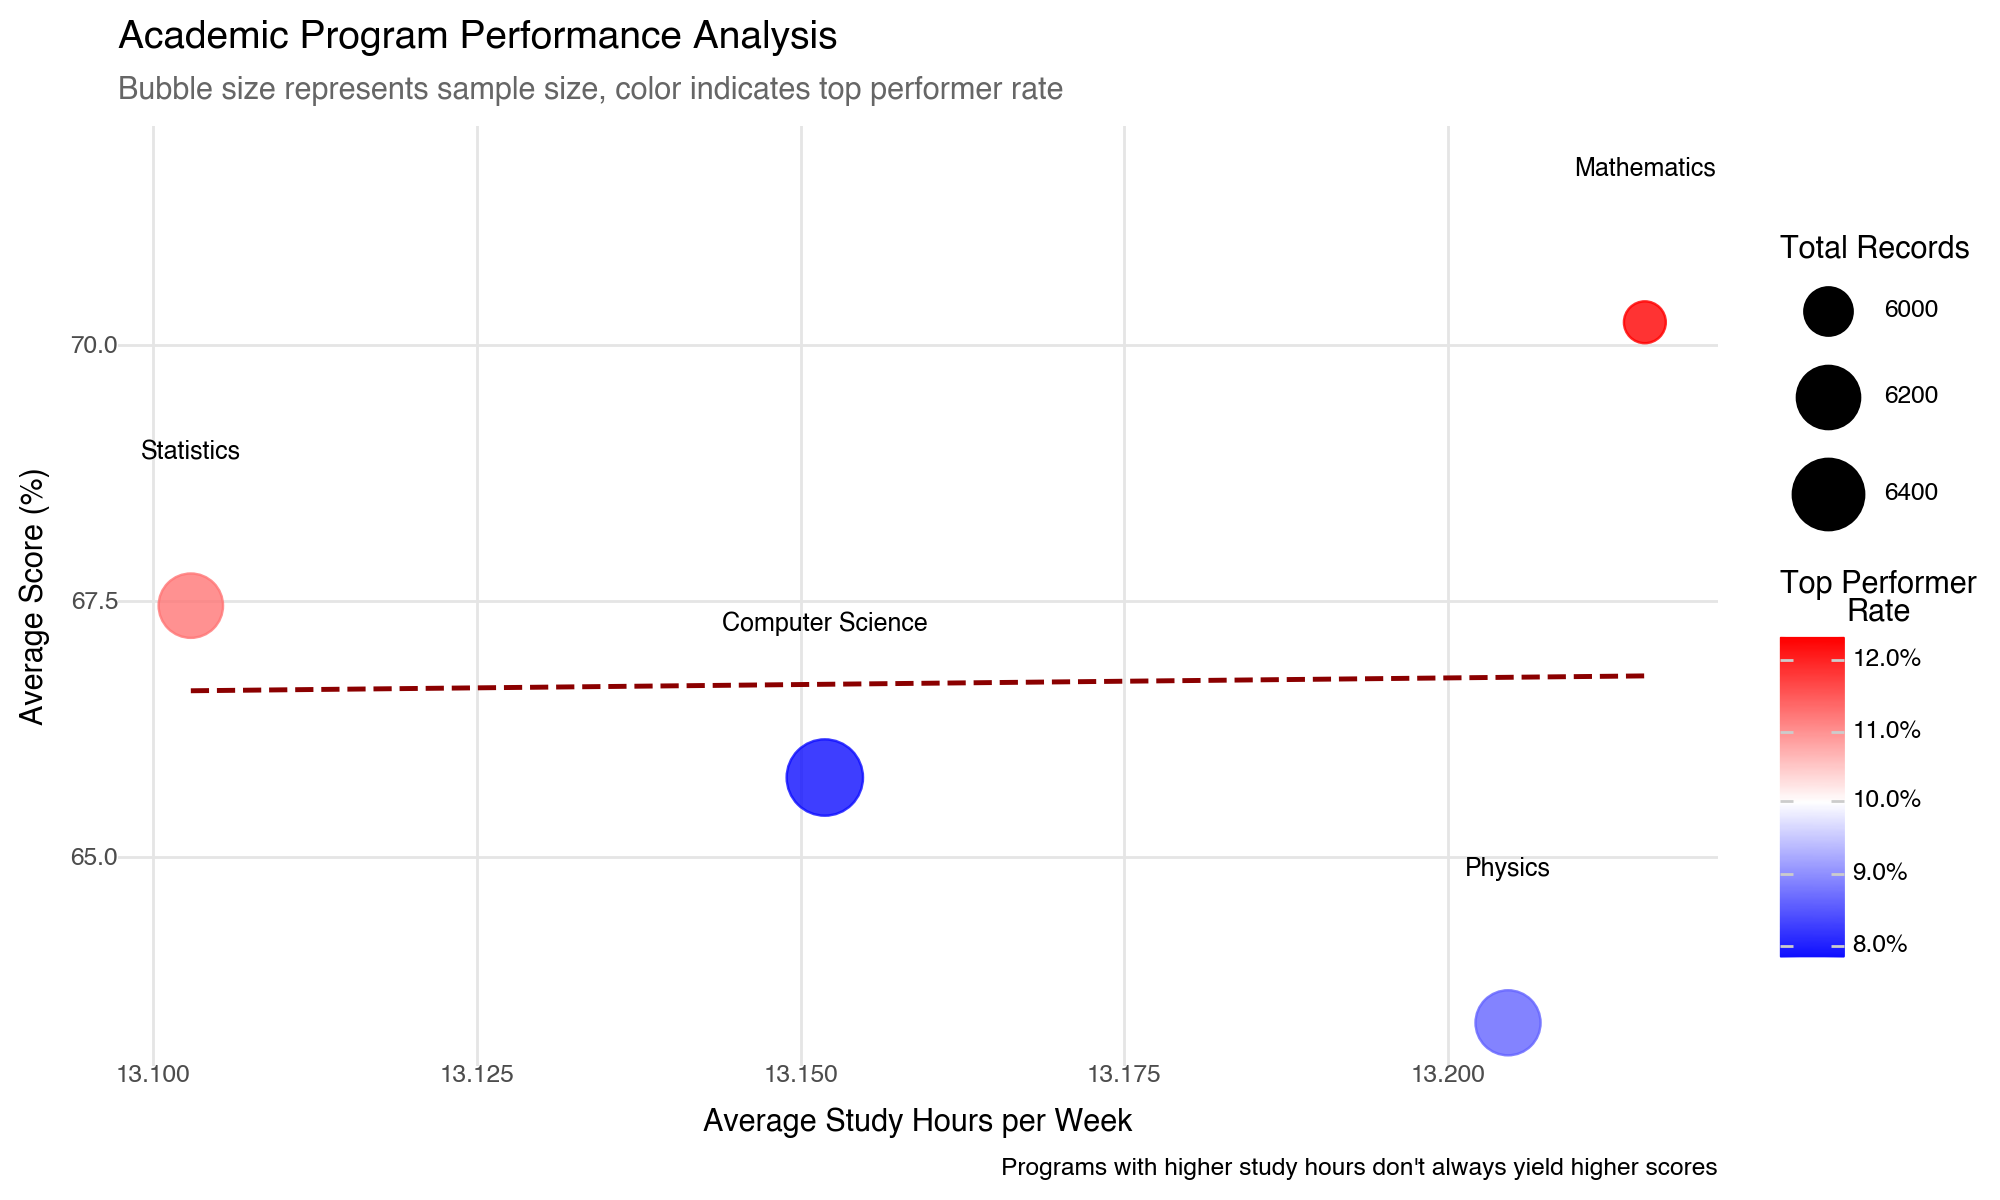

In [10]:
#| output: true

# Configure plotnine for this plot
plotnine.options.figure_size = (10, 6)

# Aggregate data for program comparison
program_summary = program_analysis.to_pandas()

# Create a sophisticated comparison plot
p2 = (
    ggplot(program_summary, aes(x="avg_study_hours", y="avg_score")) +
    
    # Add confidence ellipses based on standard deviation
    geom_point(aes(size="total_records", color="top_performer_rate"), alpha=0.8) +
    
    # Add program labels
    geom_text(aes(label="program"), nudge_y=1.5, size=9, fontweight="bold") +
    
    # Add trend line
    geom_smooth(method="lm", color="darkred", linetype="dashed", se=False) +
    
    # Customize scales
    scale_size_continuous(
        name="Total Records",
        range=(8, 15),
        guide=guide_legend(override_aes={"alpha": 1})
    ) +
    scale_color_gradient2(
        name="Top Performer\nRate",
        low="blue", mid="white", high="red",
        midpoint=0.1,
        labels=lambda breaks: [f"{x:.1%}" for x in breaks]
    ) +
    
    # Elegant theming
    labs(
        title="Academic Program Performance Analysis",
        subtitle="Bubble size represents sample size, color indicates top performer rate",
        x="Average Study Hours per Week",
        y="Average Score (%)",
        caption="Programs with higher study hours don't always yield higher scores"
    ) +
    theme_minimal() +
    theme(
        plot_title=element_text(size=14, weight="bold"),
        plot_subtitle=element_text(size=11, color="#666666"),
        legend_position="right",
        panel_grid_minor=element_blank()
    )
)

# Display the plot
p2

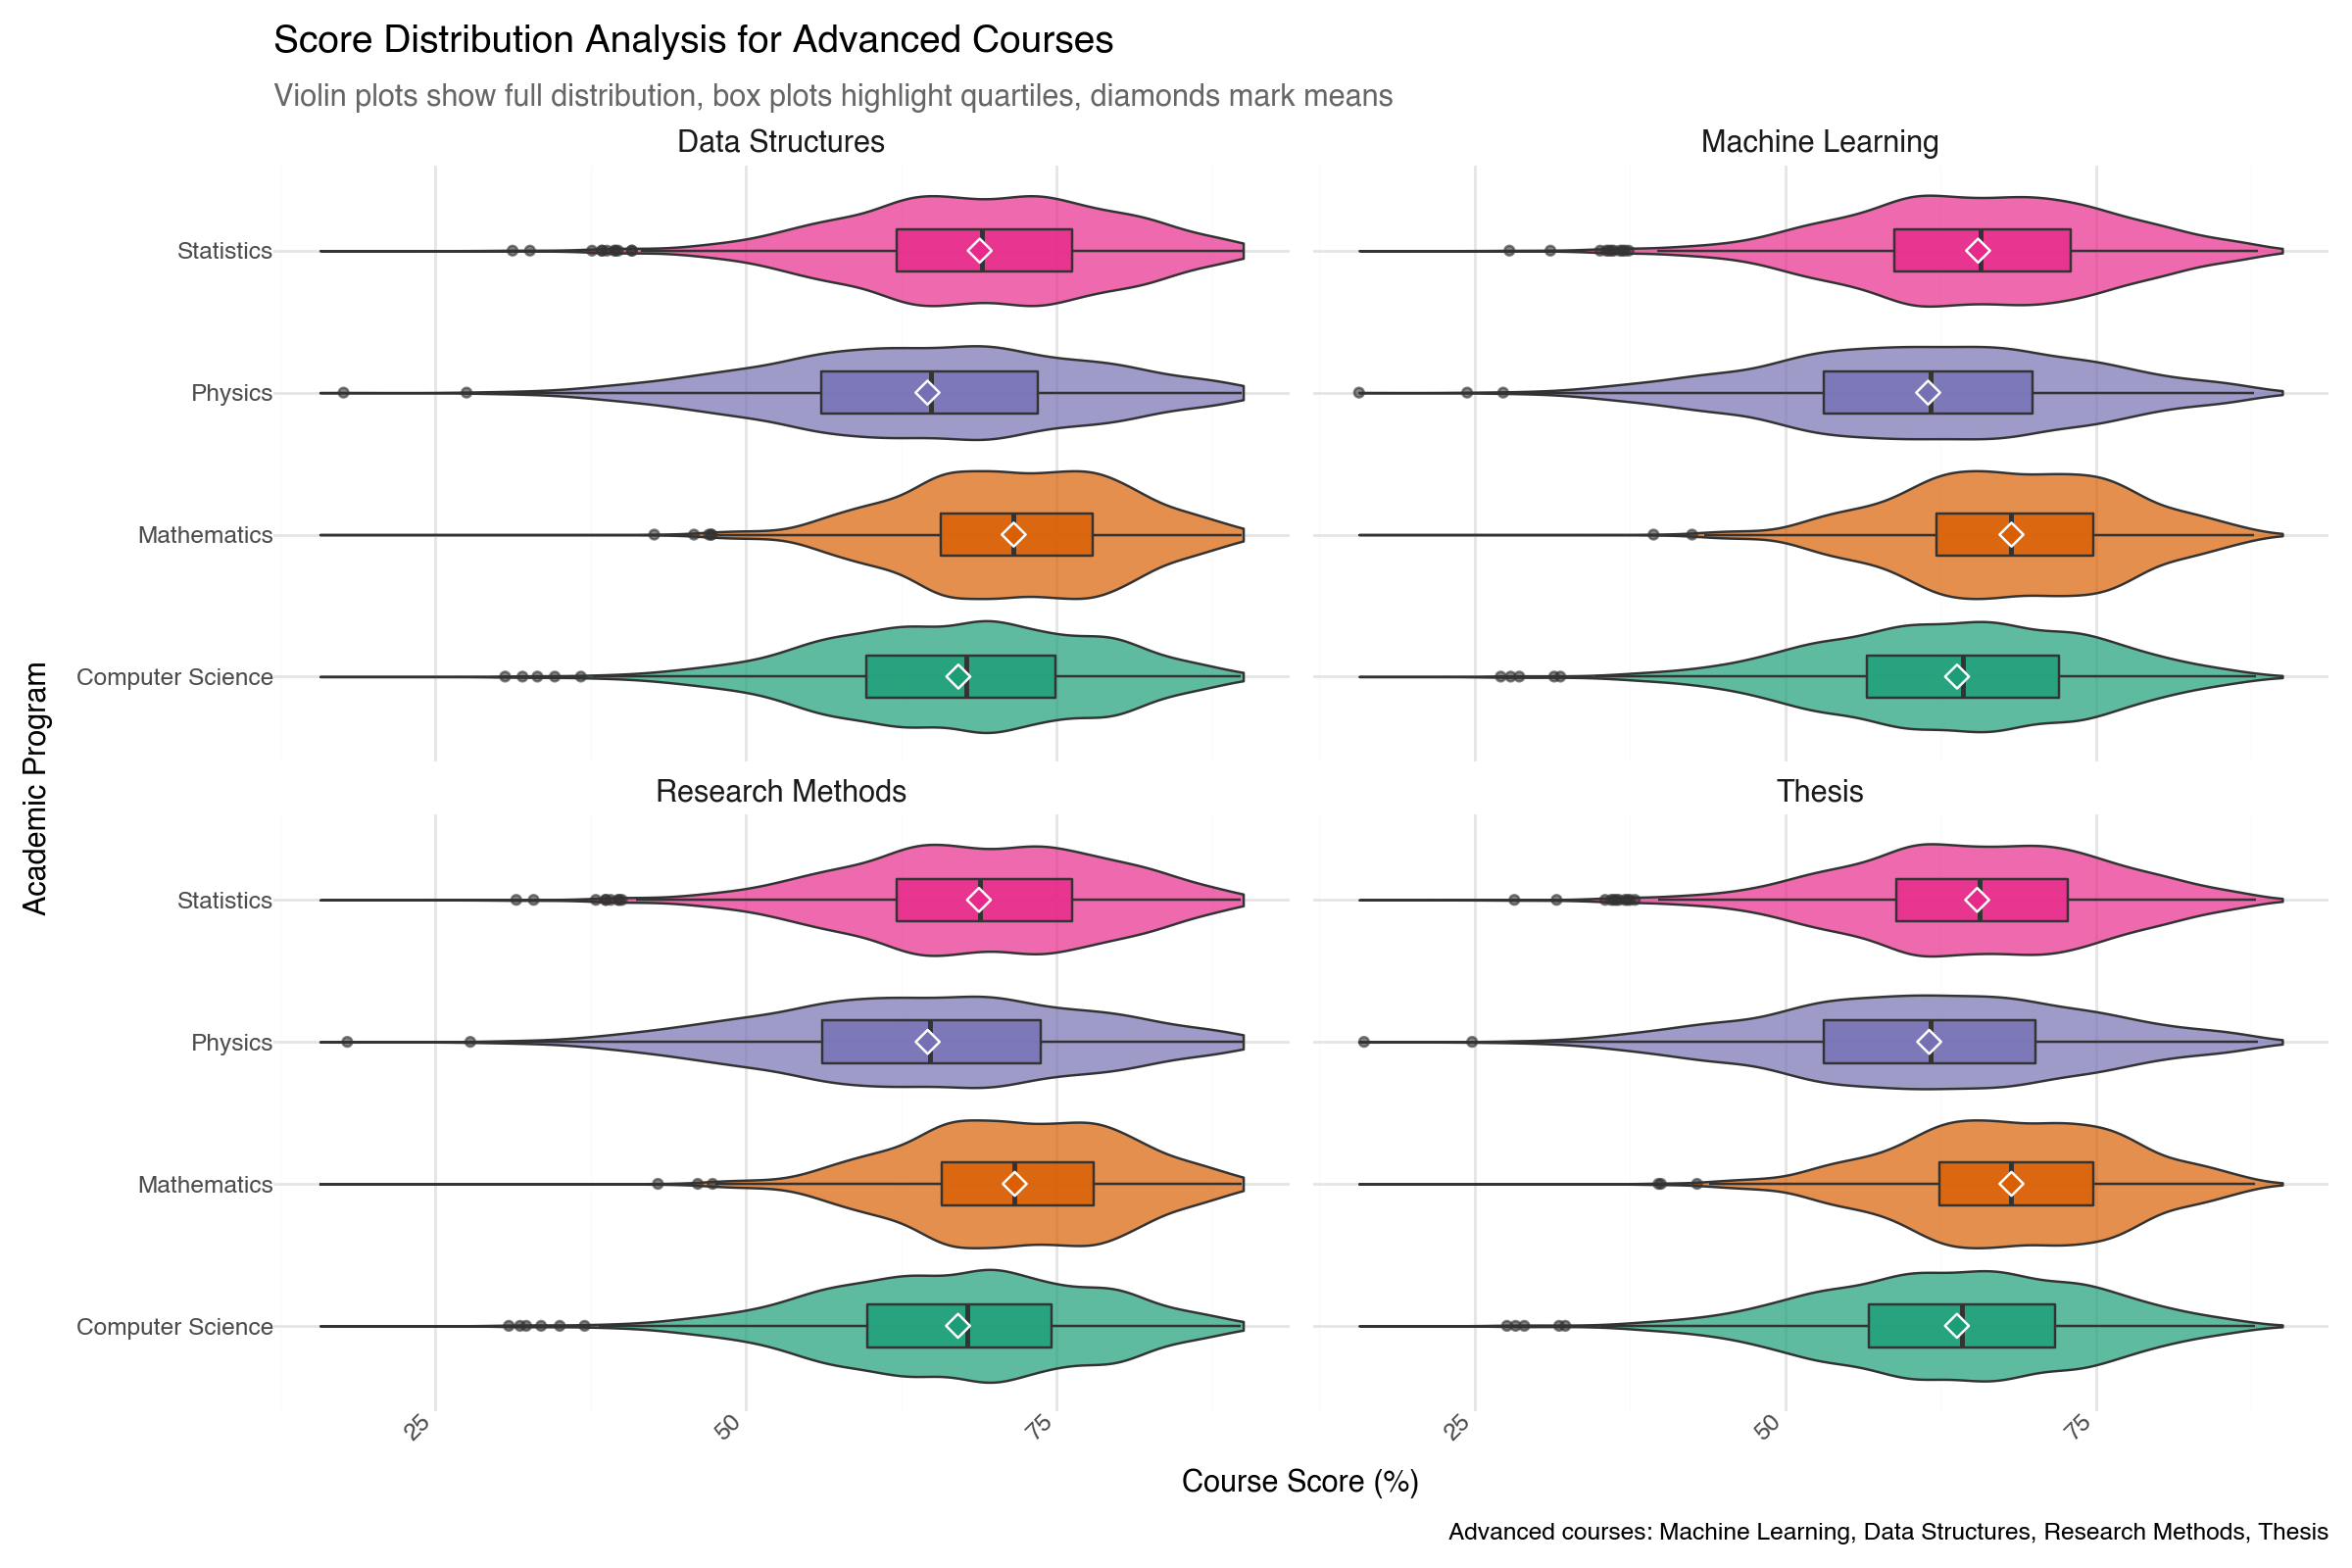

In [11]:
#| output: true

# Focus on advanced courses for distribution analysis
advanced_courses = performance_pd[
    performance_pd["course"].isin(["Machine Learning", "Data Structures", "Research Methods", "Thesis"])
]

# Configure plotnine for this plot
plotnine.options.figure_size = (12, 8)

# Create comprehensive distribution plot
p3 = (
    ggplot(advanced_courses, aes(x="program", y="score", fill="program")) +
    
    # Violin plots for distribution shape
    geom_violin(alpha=0.7, trim=False) +
    
    # Box plots for summary statistics
    geom_boxplot(width=0.3, alpha=0.8, outlier_alpha=0.6) +
    
    # Add mean points
    stat_summary(fun_y=np.mean, geom="point", size=3, color="white", shape="D") +
    
    # Facet by course
    facet_wrap("course", ncol=2) +
    
    # Color scheme
    scale_fill_brewer(type="qual", palette="Dark2") +
    
    # Coordinate system
    coord_flip() +
    
    # Labels and theme
    labs(
        title="Score Distribution Analysis for Advanced Courses",
        subtitle="Violin plots show full distribution, box plots highlight quartiles, diamonds mark means",
        x="Academic Program",
        y="Course Score (%)",
        fill="Program",
        caption="Advanced courses: Machine Learning, Data Structures, Research Methods, Thesis"
    ) +
    theme_minimal() +
    theme(
        plot_title=element_text(size=14, weight="bold"),
        plot_subtitle=element_text(size=11, color="#666666"),
        strip_text=element_text(size=11, weight="bold"),
        legend_position="none",  # Remove legend since x-axis shows programs
        axis_text_x=element_text(angle=45, hjust=1)
    )
)

# Display the plot

p3

In [12]:
import time
import pandas as pd

# Create larger dataset for meaningful comparison
large_n = 50000
large_students = pl.DataFrame({
    "student_id": range(1, large_n + 1),
    "program": np.random.choice(["CS", "Math", "Physics", "Stats"], large_n),
    "score": np.random.normal(75, 15, large_n),
    "study_hours": np.random.gamma(3, 2, large_n),
    "semester": np.random.choice(range(1, 9), large_n)
})

# Convert to pandas for comparison
large_students_pd = large_students.to_pandas()

print(f"Dataset size: {large_students.shape[0]:,} rows")

Dataset size: 50,000 rows


In [13]:
# Benchmark complex aggregation operations

def benchmark_polars():
    start_time = time.time()
    result = (
        large_students
        .group_by(["program", "semester"])
        .agg([
            pl.col("score").mean().alias("avg_score"),
            pl.col("score").std().alias("std_score"),
            pl.col("study_hours").mean().alias("avg_hours"),
            pl.col("score").quantile(0.9).alias("score_90th"),
            pl.count().alias("count")
        ])
        .filter(pl.col("count") >= 100)
        .sort(["program", "semester"])
    )
    end_time = time.time()
    return end_time - start_time, result.shape[0]

def benchmark_pandas():
    start_time = time.time()
    result = (
        large_students_pd
        .groupby(["program", "semester"])
        .agg({
            "score": ["mean", "std", lambda x: x.quantile(0.9)],
            "study_hours": "mean",
            "student_id": "count"
        })
        .reset_index()
    )
    # Flatten column names
    result.columns = ["_".join(col).strip() if col[1] else col[0] for col in result.columns]
    result = result[result.iloc[:, -1] >= 100]  # Filter by count
    end_time = time.time()
    return end_time - start_time, result.shape[0]

# Run benchmarks
polars_time, polars_rows = benchmark_polars()
pandas_time, pandas_rows = benchmark_pandas()

print(f"Polars: {polars_time:.4f} seconds ({polars_rows} result rows)")
print(f"Pandas: {pandas_time:.4f} seconds ({pandas_rows} result rows)")
print(f"Speedup: {pandas_time/polars_time:.2f}x faster with Polars")

Polars: 0.0016 seconds (32 result rows)
Pandas: 0.0073 seconds (32 result rows)
Speedup: 4.69x faster with Polars


In [14]:
# Memory usage comparison
print("Memory usage comparison:")
print(f"Polars DataFrame: {large_students.estimated_size('mb'):.2f} MB")
print(f"Pandas DataFrame: {large_students_pd.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Show data types efficiency
print("\nData types:")
print("Polars dtypes:")
for col, dtype in zip(large_students.columns, large_students.dtypes):
    print(f"  {col}: {dtype}")
    
print("\nPandas dtypes:")
for col, dtype in large_students_pd.dtypes.items():
    print(f"  {col}: {dtype}")

Memory usage comparison:
Polars DataFrame: 1.74 MB
Pandas DataFrame: 4.08 MB

Data types:
Polars dtypes:
  student_id: Int64
  program: String
  score: Float64
  study_hours: Float64
  semester: Int64

Pandas dtypes:
  student_id: int64
  program: object
  score: float64
  study_hours: float64
  semester: int64


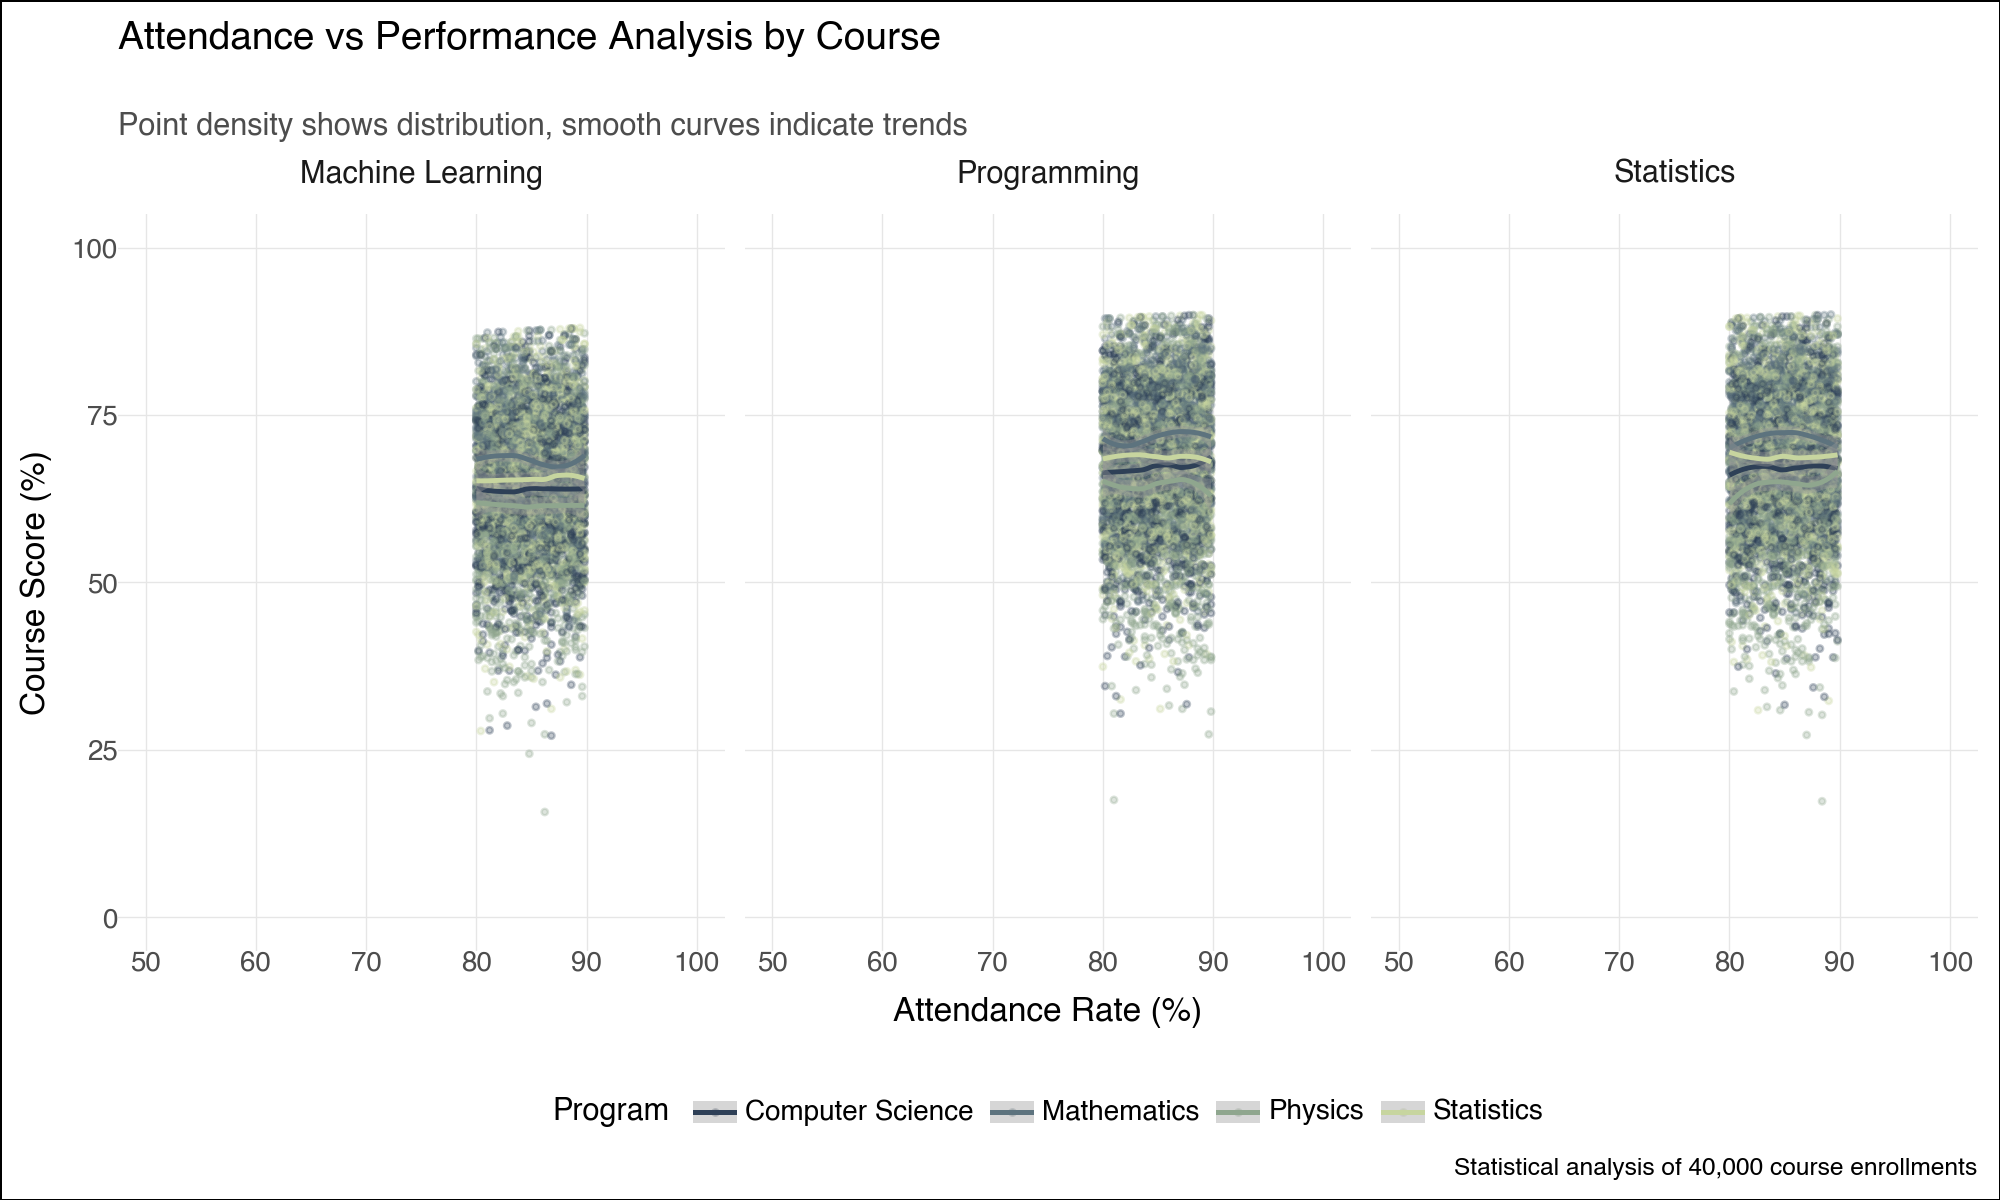

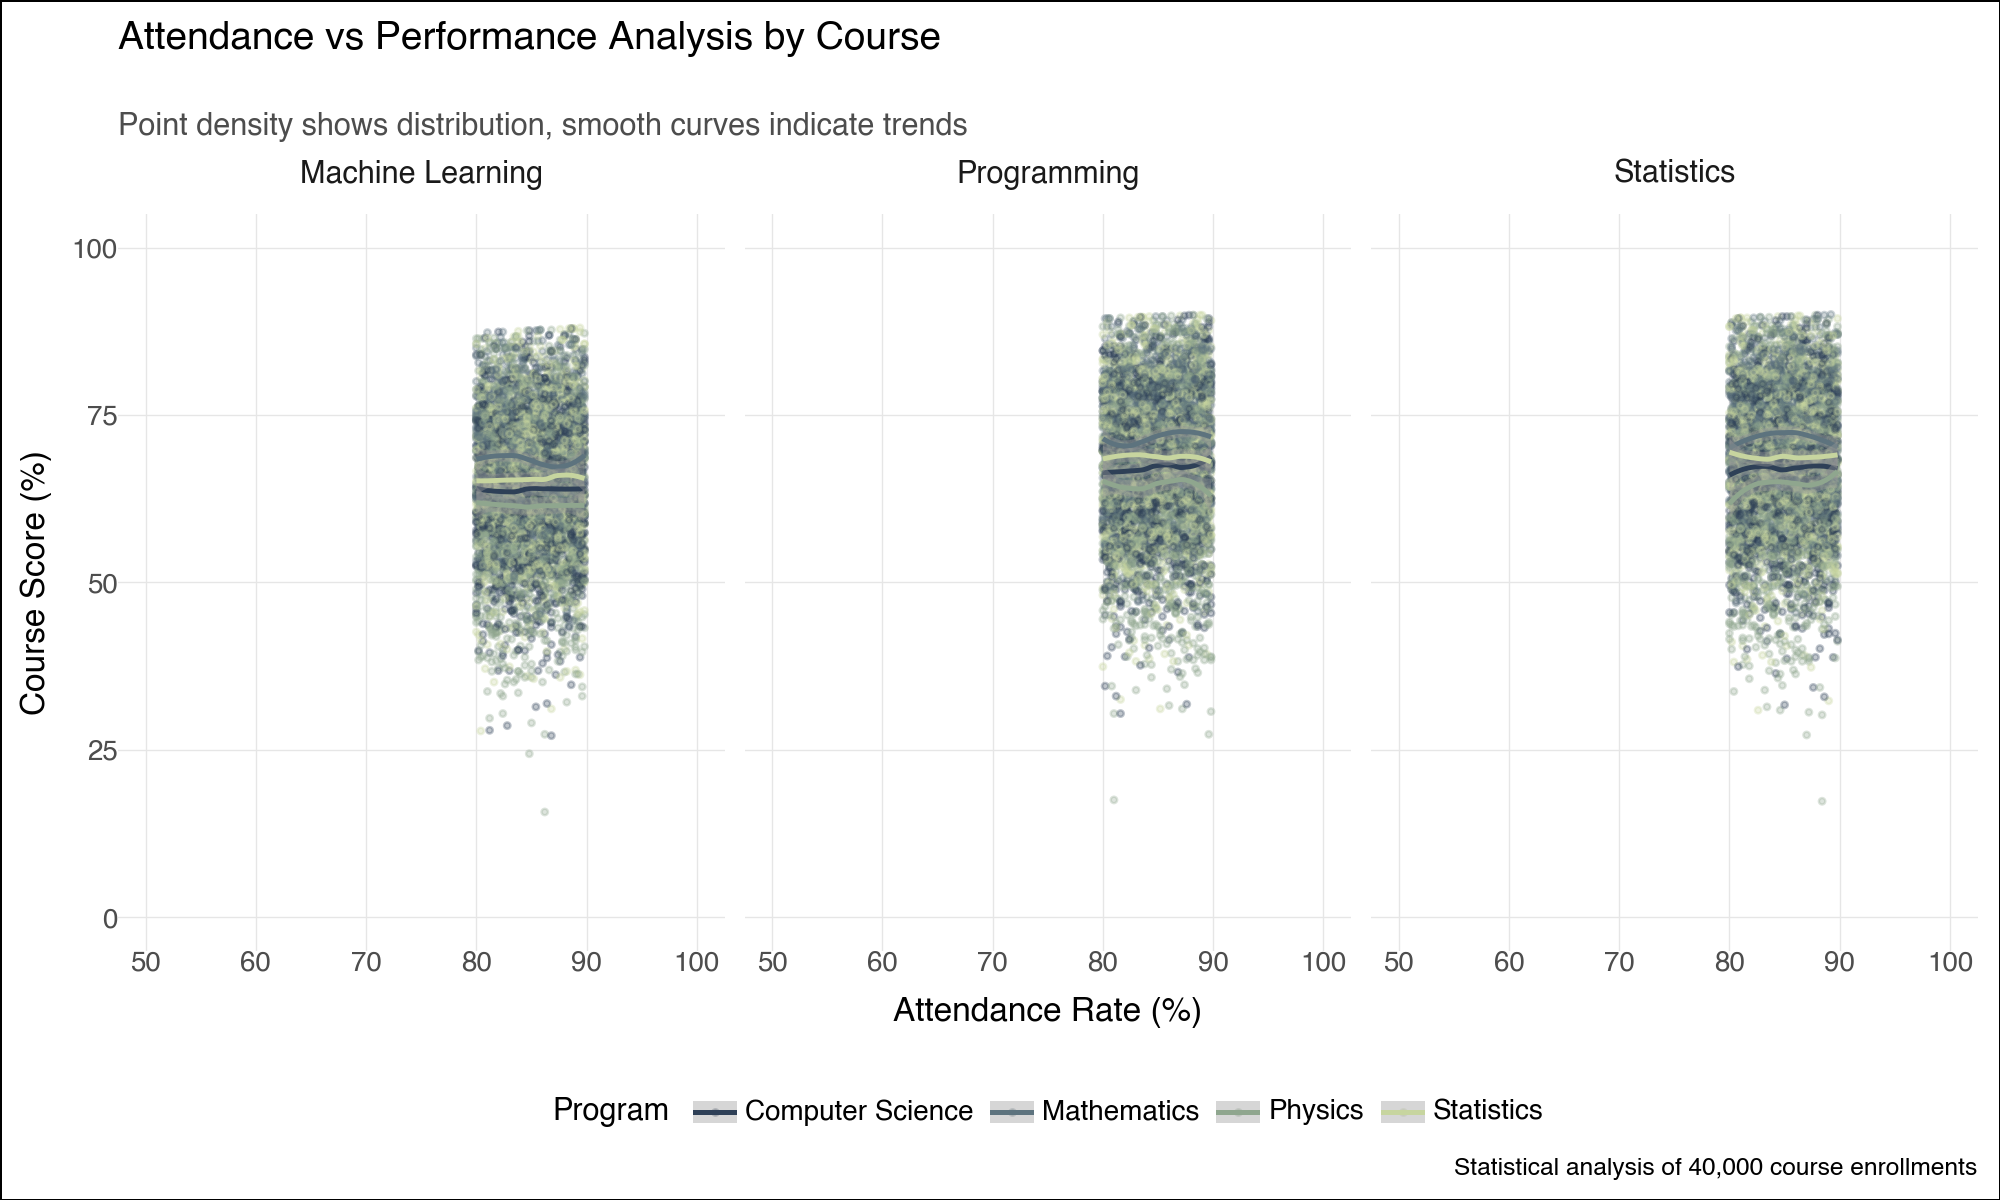

In [15]:
#| output: true

# Configure plotnine for this plot
plotnine.options.figure_size = (10, 6)

# Create a custom theme for academic publications
academic_theme = theme_minimal() + theme(
    plot_title=element_text(size=14, weight="bold", margin={"b": 20}),
    plot_subtitle=element_text(size=11, color="#4d4d4d", margin={"b": 15}),
    axis_title=element_text(size=12, weight="bold"),
    axis_text=element_text(size=10),
    legend_title=element_text(size=11, weight="bold"),
    legend_text=element_text(size=10),
    strip_text=element_text(size=11, weight="bold", margin={"b": 10}),
    panel_grid_major=element_line(color="#e6e6e6", size=0.5),
    panel_grid_minor=element_blank(),
    plot_background=element_rect(fill="white"),
    panel_background=element_rect(fill="white")
)

# Advanced statistical visualization
study_performance = (
    performance_df
    .filter(pl.col("course").is_in(["Programming", "Machine Learning", "Statistics"]))
    .to_pandas()
)

p4 = (
    ggplot(study_performance, aes(x="attendance", y="score")) +
    
    # Add points with transparency to show density
    geom_point(aes(color="program"), alpha=0.3, size=0.8) +
    
    # Add smooth trend lines
    geom_smooth(aes(color="program"), method="loess", se=True) +
    
    # Facet by course
    facet_wrap("course", ncol=3) +
    
    # Custom color palette
    scale_color_manual(
        values=["#2E4057", "#5D737E", "#8FA68E", "#C7D59F"],
        name="Program"
    ) +
    
    # Coordinate limits
    xlim(50, 100) +
    ylim(0, 100) +
    
    # Labels
    labs(
        title="Attendance vs Performance Analysis by Course",
        subtitle="Point density shows distribution, smooth curves indicate trends",
        x="Attendance Rate (%)",
        y="Course Score (%)",
        caption="Statistical analysis of 40,000 course enrollments"
    ) +
    
    # Apply custom theme
    academic_theme +
    theme(legend_position="bottom")
)

# Display the plot
display(p4)
p4

Processed data shape: (139, 7)


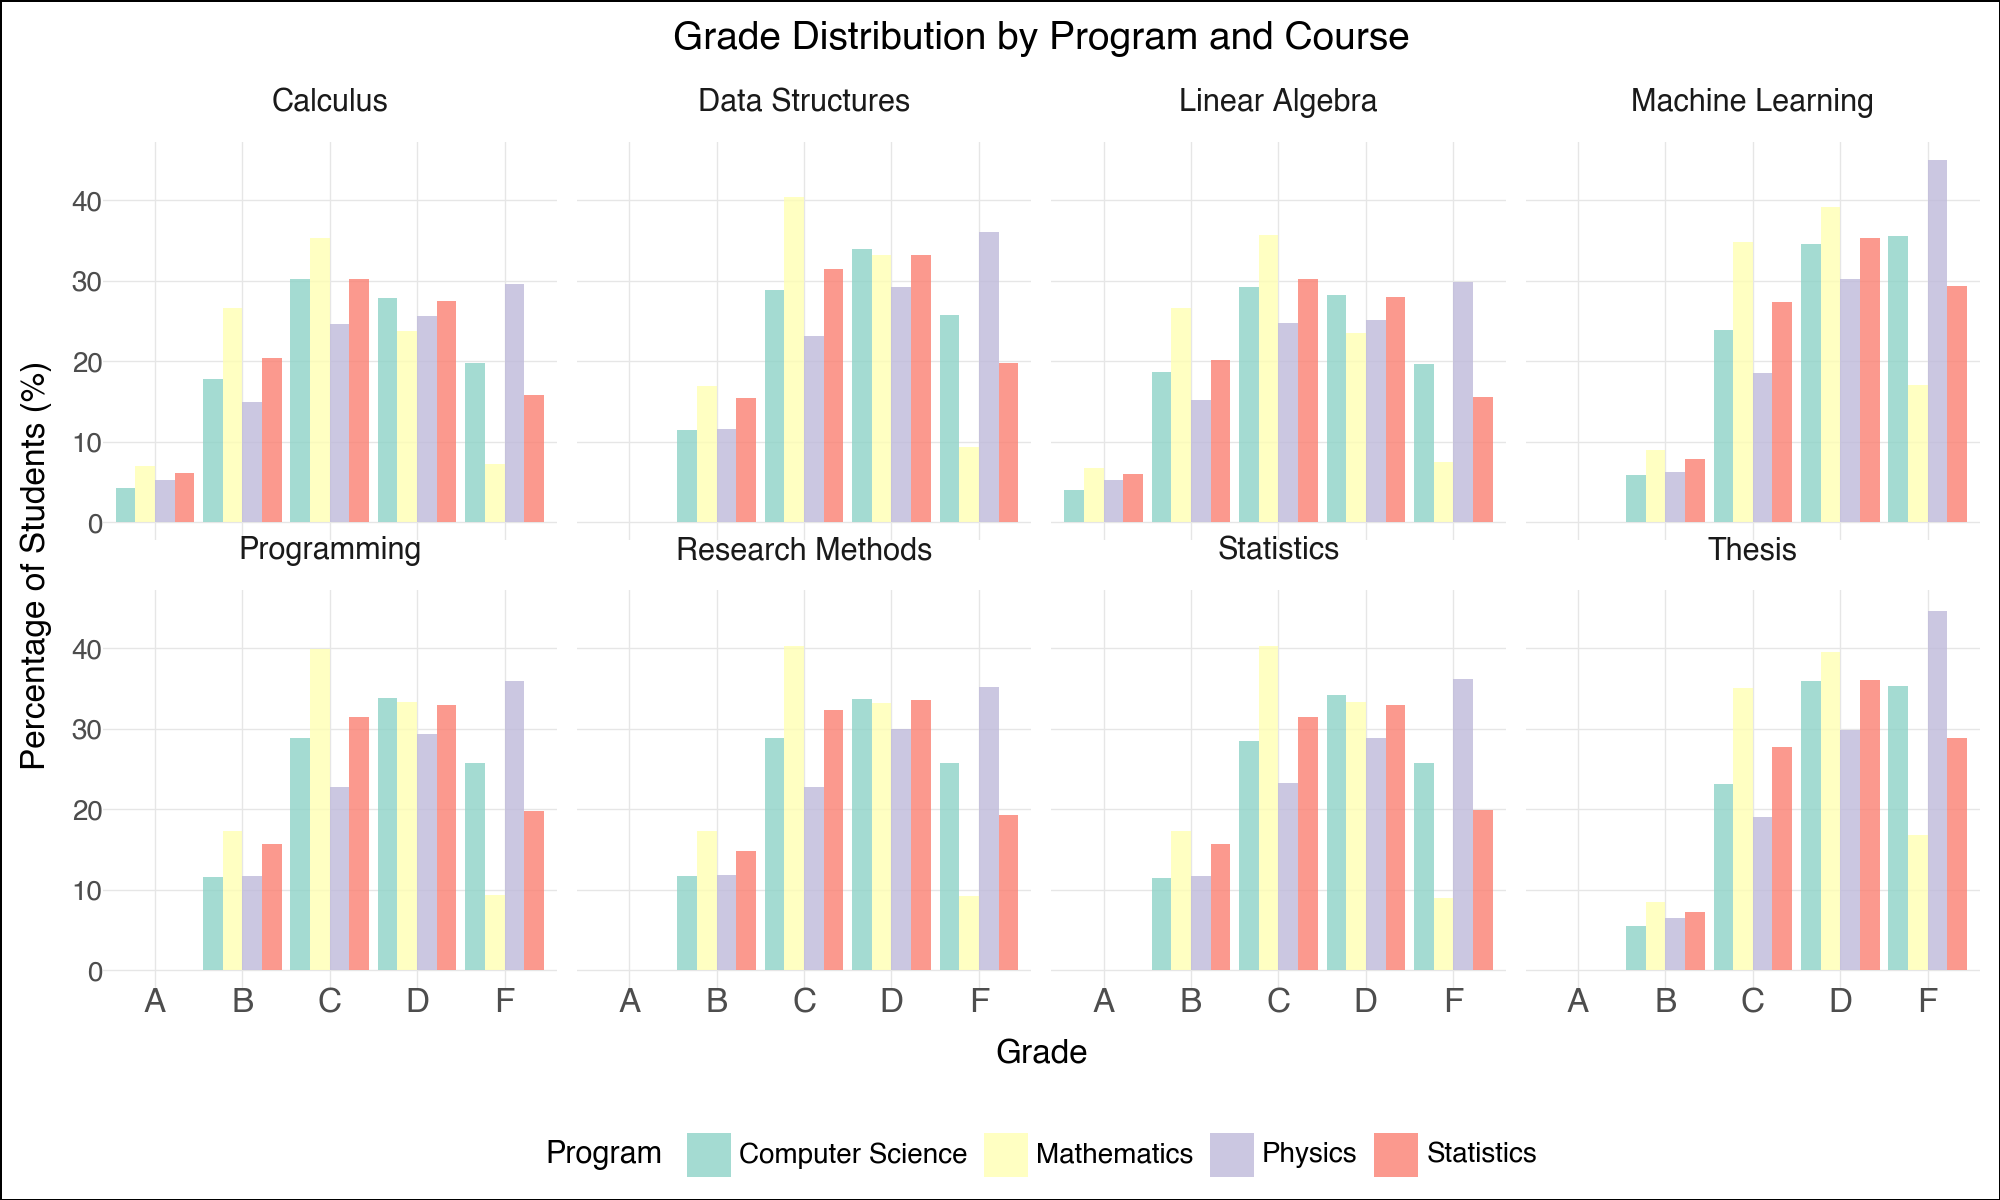

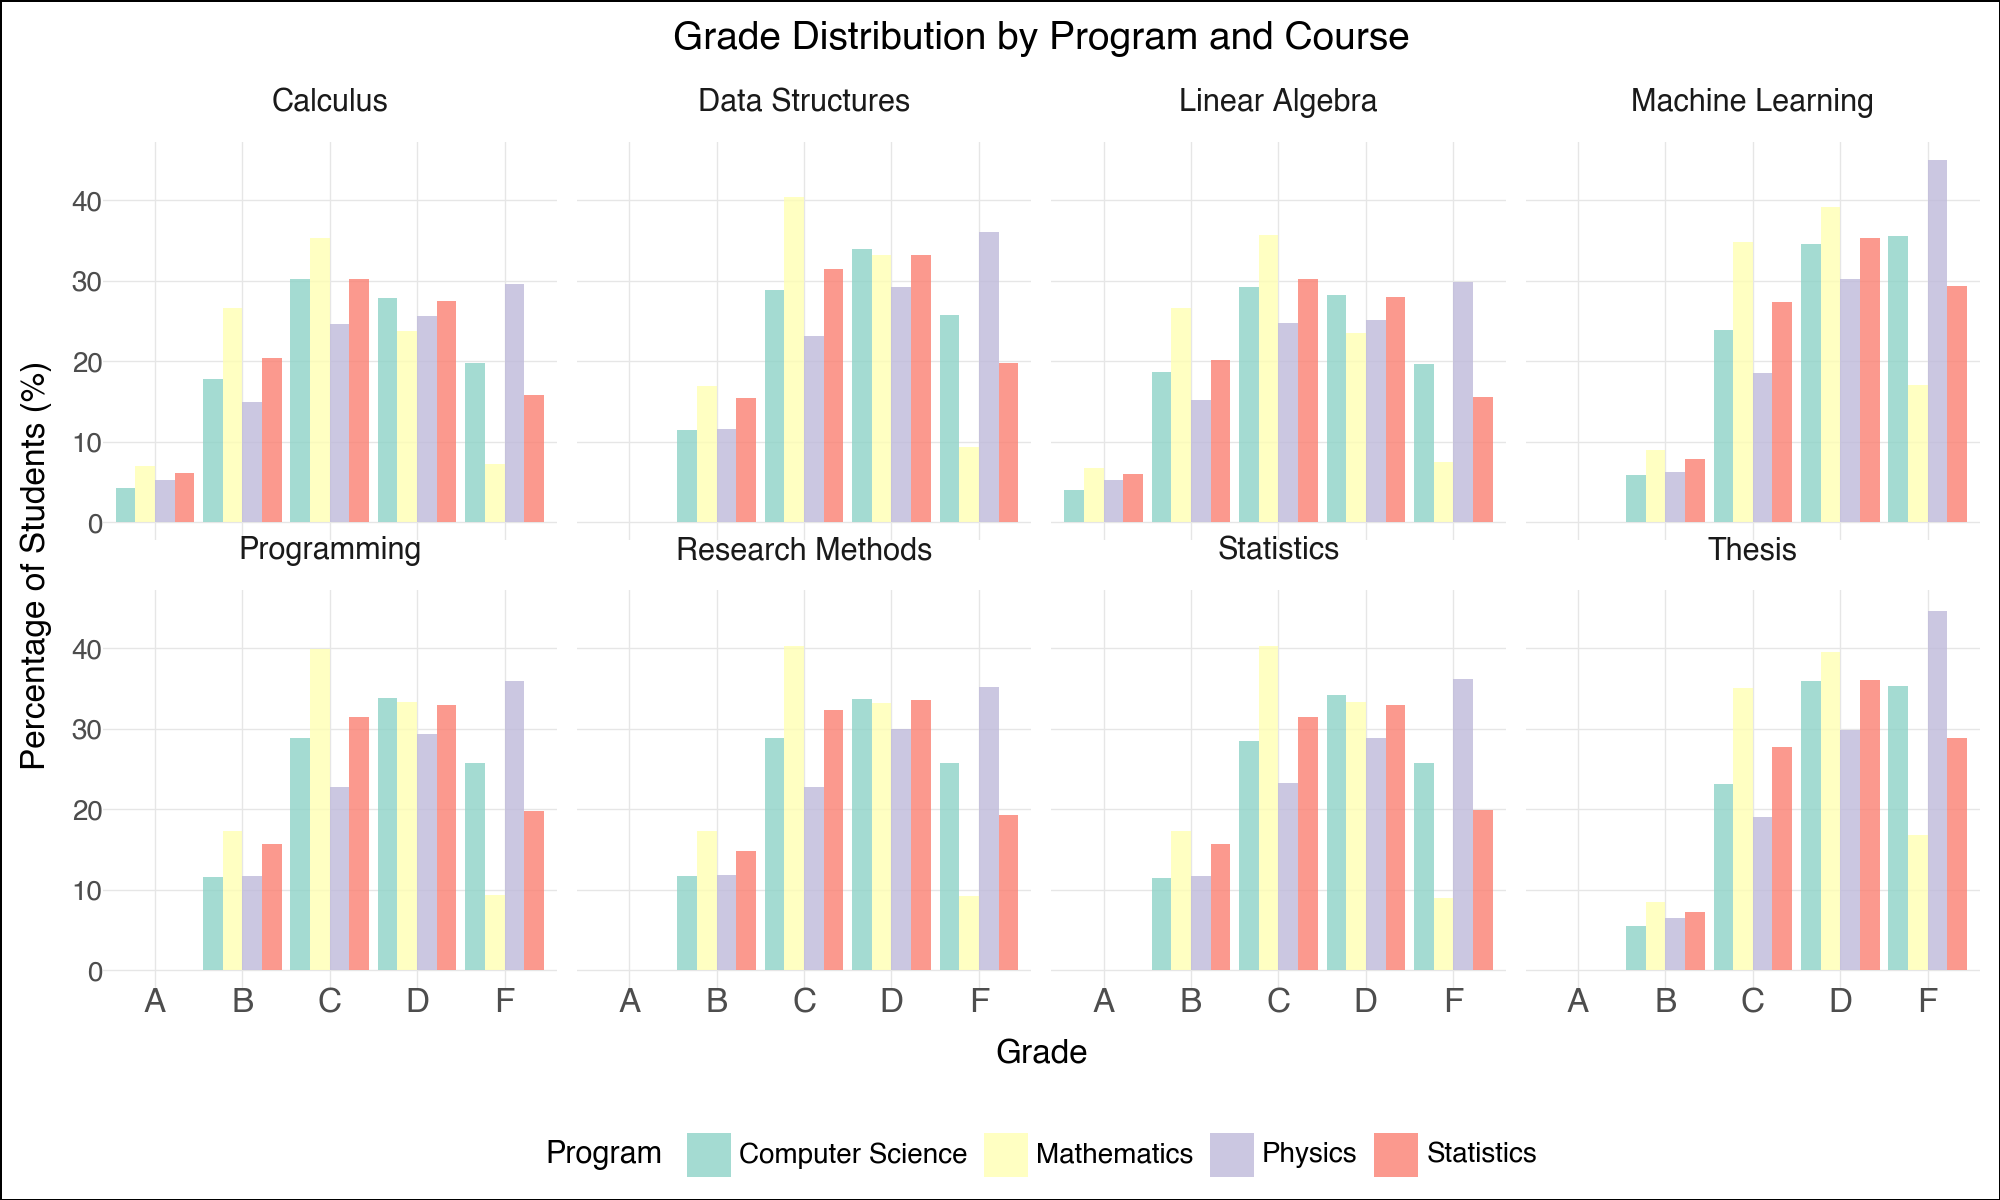

In [16]:
# Demonstrate efficient Polars → plotnine workflow
def create_analysis_pipeline(data: pl.DataFrame, analysis_type: str):
    """
    Efficient pipeline that processes data in Polars and visualizes with plotnine
    """
    
    if analysis_type == "performance_trends":
        # Complex Polars aggregation
        processed = (
            data
            .with_columns([
                pl.when(pl.col("score") >= 90).then(pl.lit("A"))
                  .when(pl.col("score") >= 80).then(pl.lit("B")) 
                  .when(pl.col("score") >= 70).then(pl.lit("C"))
                  .when(pl.col("score") >= 60).then(pl.lit("D"))
                  .otherwise(pl.lit("F")).alias("grade")
            ])
            .group_by(["course", "program", "grade"])
            .agg([
                pl.count().alias("student_count"),
                pl.col("study_hours").mean().alias("avg_study_hours")
            ])
            .with_columns([
                pl.col("student_count").sum().over(["course", "program"]).alias("total_students")
            ])
            .with_columns([
                (pl.col("student_count") / pl.col("total_students") * 100).alias("percentage")
            ])
            .filter(pl.col("total_students") >= 50)  # Sufficient sample size
        )
        
        # Convert to pandas only for plotting
        plot_data = processed.to_pandas()
        
        # Configure plotnine for this plot
        plotnine.options.figure_size = (10, 6)
        
        # Create visualization
        p = (
            ggplot(plot_data, aes(x="grade", y="percentage", fill="program")) +
            geom_col(position="dodge", alpha=0.8) +
            facet_wrap("course", ncol=4) +
            scale_fill_brewer(type="qual", palette="Set3") +
            labs(
                title="Grade Distribution by Program and Course",
                x="Grade", y="Percentage of Students (%)",
                fill="Program"
            ) +
            academic_theme +
            theme(
                axis_text_x=element_text(size=12, weight="bold"),
                legend_position="bottom"
            )
        )
        
        return processed, p
    
    else:
        raise ValueError("Unknown analysis type")

# Execute pipeline
grade_analysis, grade_plot = create_analysis_pipeline(performance_df, "performance_trends")

print("Processed data shape:", grade_analysis.shape)
# Display the plot
display(grade_plot)
grade_plot

In [17]:
# Simulate a complete educational analytics workflow

# 1. Data Quality Assessment with Polars
# Create quality report with separate operations to avoid mixing agg types
null_counts = performance_df.null_count()
stats_summary = performance_df.select([
    pl.col("score").min().alias("score_min"),
    pl.col("score").max().alias("score_max"),
    pl.col("score").mean().alias("score_mean"),
])
quality_flags = performance_df.select([
    (pl.col("score") < 0).sum().alias("negative_scores"),
    (pl.col("score") > 100).sum().alias("invalid_scores"),
    (pl.col("study_hours") < 0).sum().alias("negative_hours"),
])

print("Data Quality Report:")
print("Null counts:")
print(null_counts)
print("\nStatistical summary:")
print(stats_summary)
print("\nQuality flags:")
print(quality_flags)

Data Quality Report:
Null counts:
shape: (1, 8)
┌────────────┬─────────┬─────┬────────┬──────────┬───────┬─────────────┬────────────┐
│ student_id ┆ program ┆ gpa ┆ course ┆ semester ┆ score ┆ study_hours ┆ attendance │
│ ---        ┆ ---     ┆ --- ┆ ---    ┆ ---      ┆ ---   ┆ ---         ┆ ---        │
│ u32        ┆ u32     ┆ u32 ┆ u32    ┆ u32      ┆ u32   ┆ u32         ┆ u32        │
╞════════════╪═════════╪═════╪════════╪══════════╪═══════╪═════════════╪════════════╡
│ 0          ┆ 0       ┆ 0   ┆ 0      ┆ 0        ┆ 0     ┆ 0           ┆ 0          │
└────────────┴─────────┴─────┴────────┴──────────┴───────┴─────────────┴────────────┘

Statistical summary:
shape: (1, 3)
┌───────────┬───────────┬────────────┐
│ score_min ┆ score_max ┆ score_mean │
│ ---       ┆ ---       ┆ ---        │
│ f64       ┆ f64       ┆ f64        │
╞═══════════╪═══════════╪════════════╡
│ 15.3      ┆ 98.0      ┆ 67.94946   │
└───────────┴───────────┴────────────┘

Quality flags:
shape: (1, 3)
┌──────────

In [18]:
# 2. Predictive modeling preparation
# Check what columns we have available
print("Performance DataFrame columns:", performance_df.columns)

# Create modeling features directly from performance_df (which already includes key student data)
modeling_data = (
    performance_df
    .with_columns([
        # Feature engineering - simplified approach
        pl.col("score").shift(1, fill_value=0).over("student_id").alias("previous_score"),
        pl.col("study_hours").mean().over("student_id").alias("avg_study_hours_student"),
        (pl.col("attendance") >= 85).alias("high_attendance"),
        
        # Target encoding - course difficulty (average score for each course)
        pl.col("score").mean().over("course").alias("course_difficulty"),
        
        # Interaction features
        (pl.col("study_hours") * pl.col("attendance") / 100.0).alias("effective_study_time"),
        
        # Course progress indicator
        pl.col("semester").rank().over("student_id").alias("course_sequence")
    ])
    .filter(pl.col("score").is_not_null())  # Remove missing values for modeling
)

print("Modeling dataset shape:", modeling_data.shape)
print("Features available for modeling:")
print(modeling_data.columns)

Performance DataFrame columns: ['student_id', 'program', 'gpa', 'course', 'semester', 'score', 'study_hours', 'attendance']
Modeling dataset shape: (40000, 14)
Features available for modeling:
['student_id', 'program', 'gpa', 'course', 'semester', 'score', 'study_hours', 'attendance', 'previous_score', 'avg_study_hours_student', 'high_attendance', 'course_difficulty', 'effective_study_time', 'course_sequence']


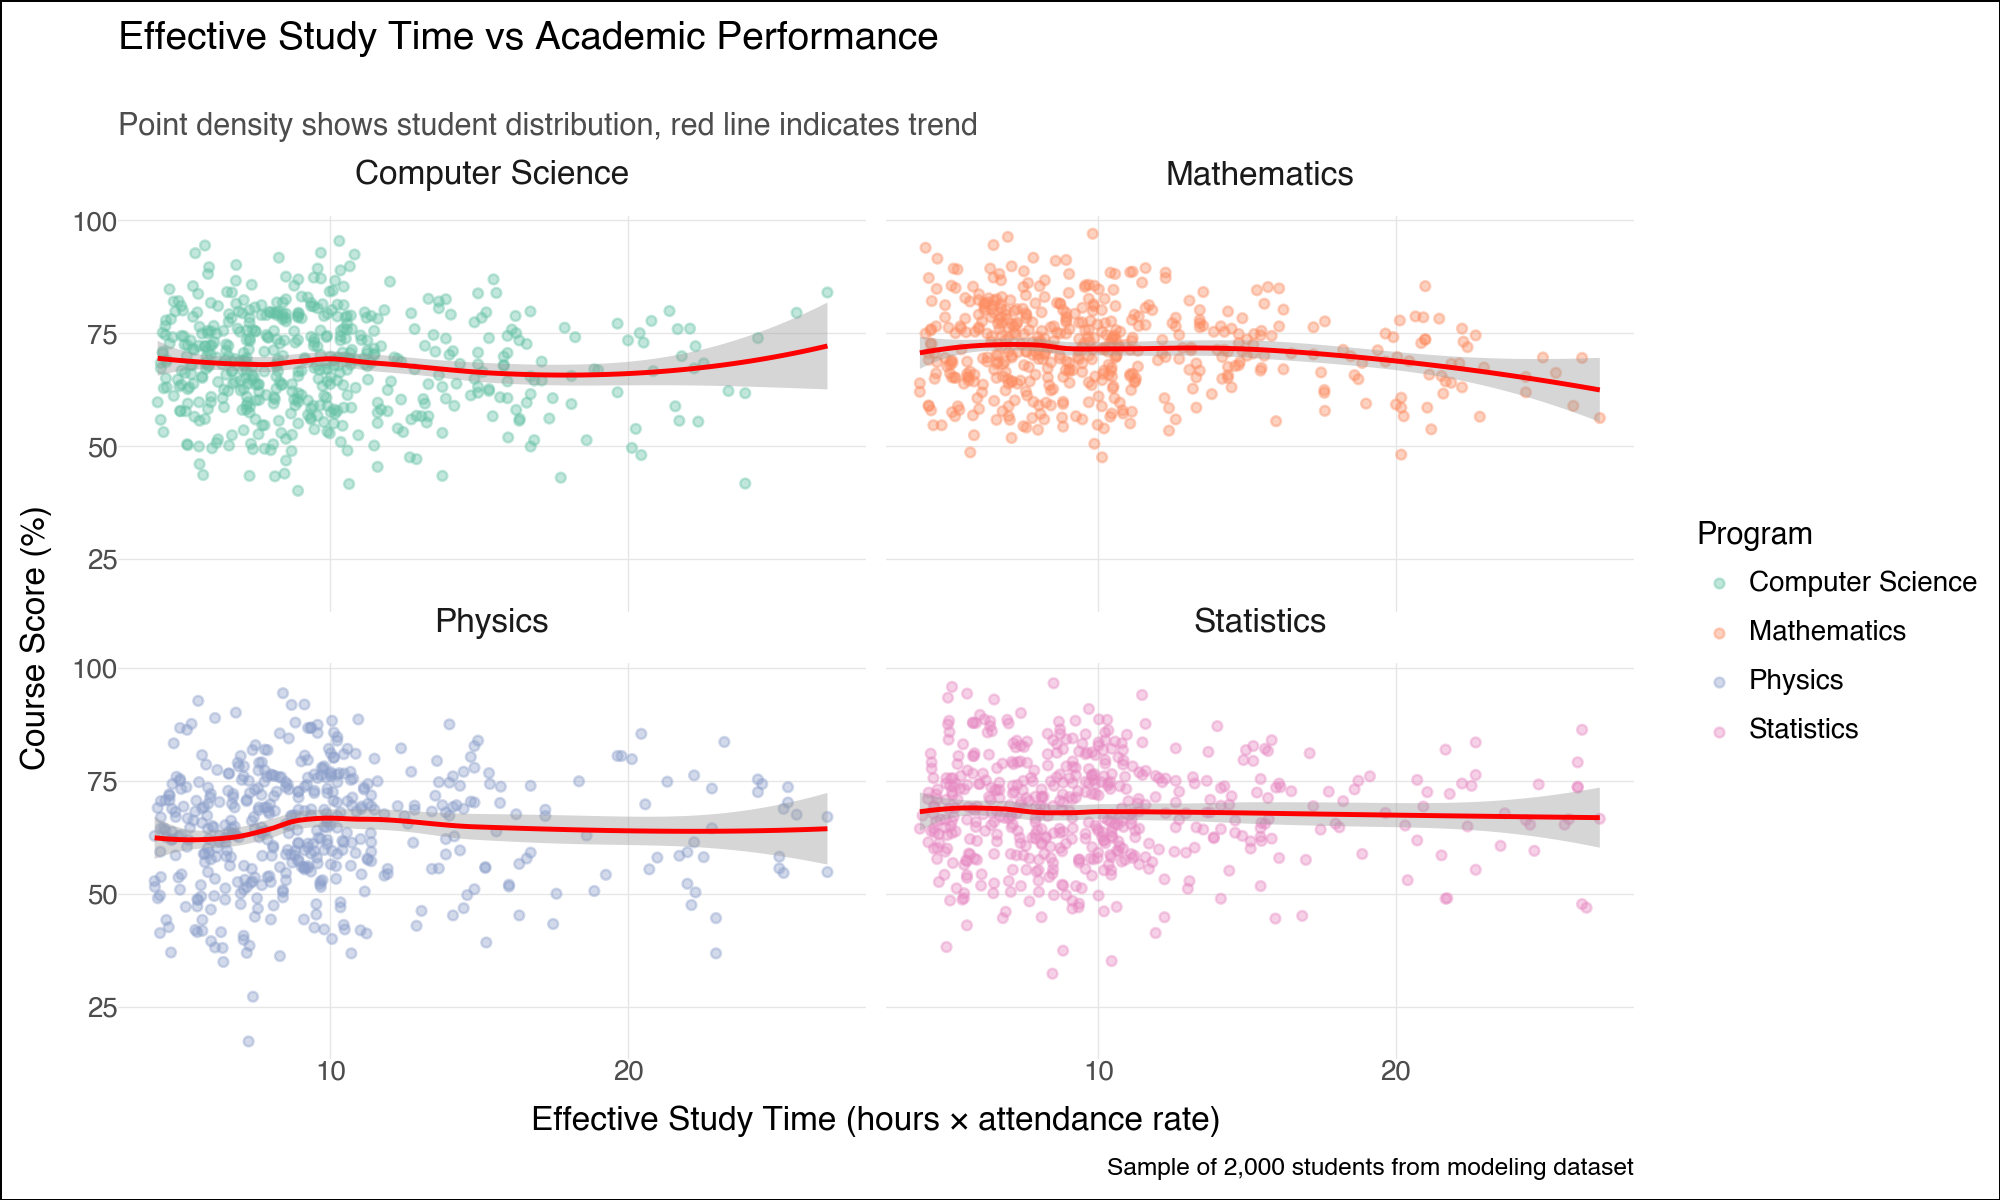

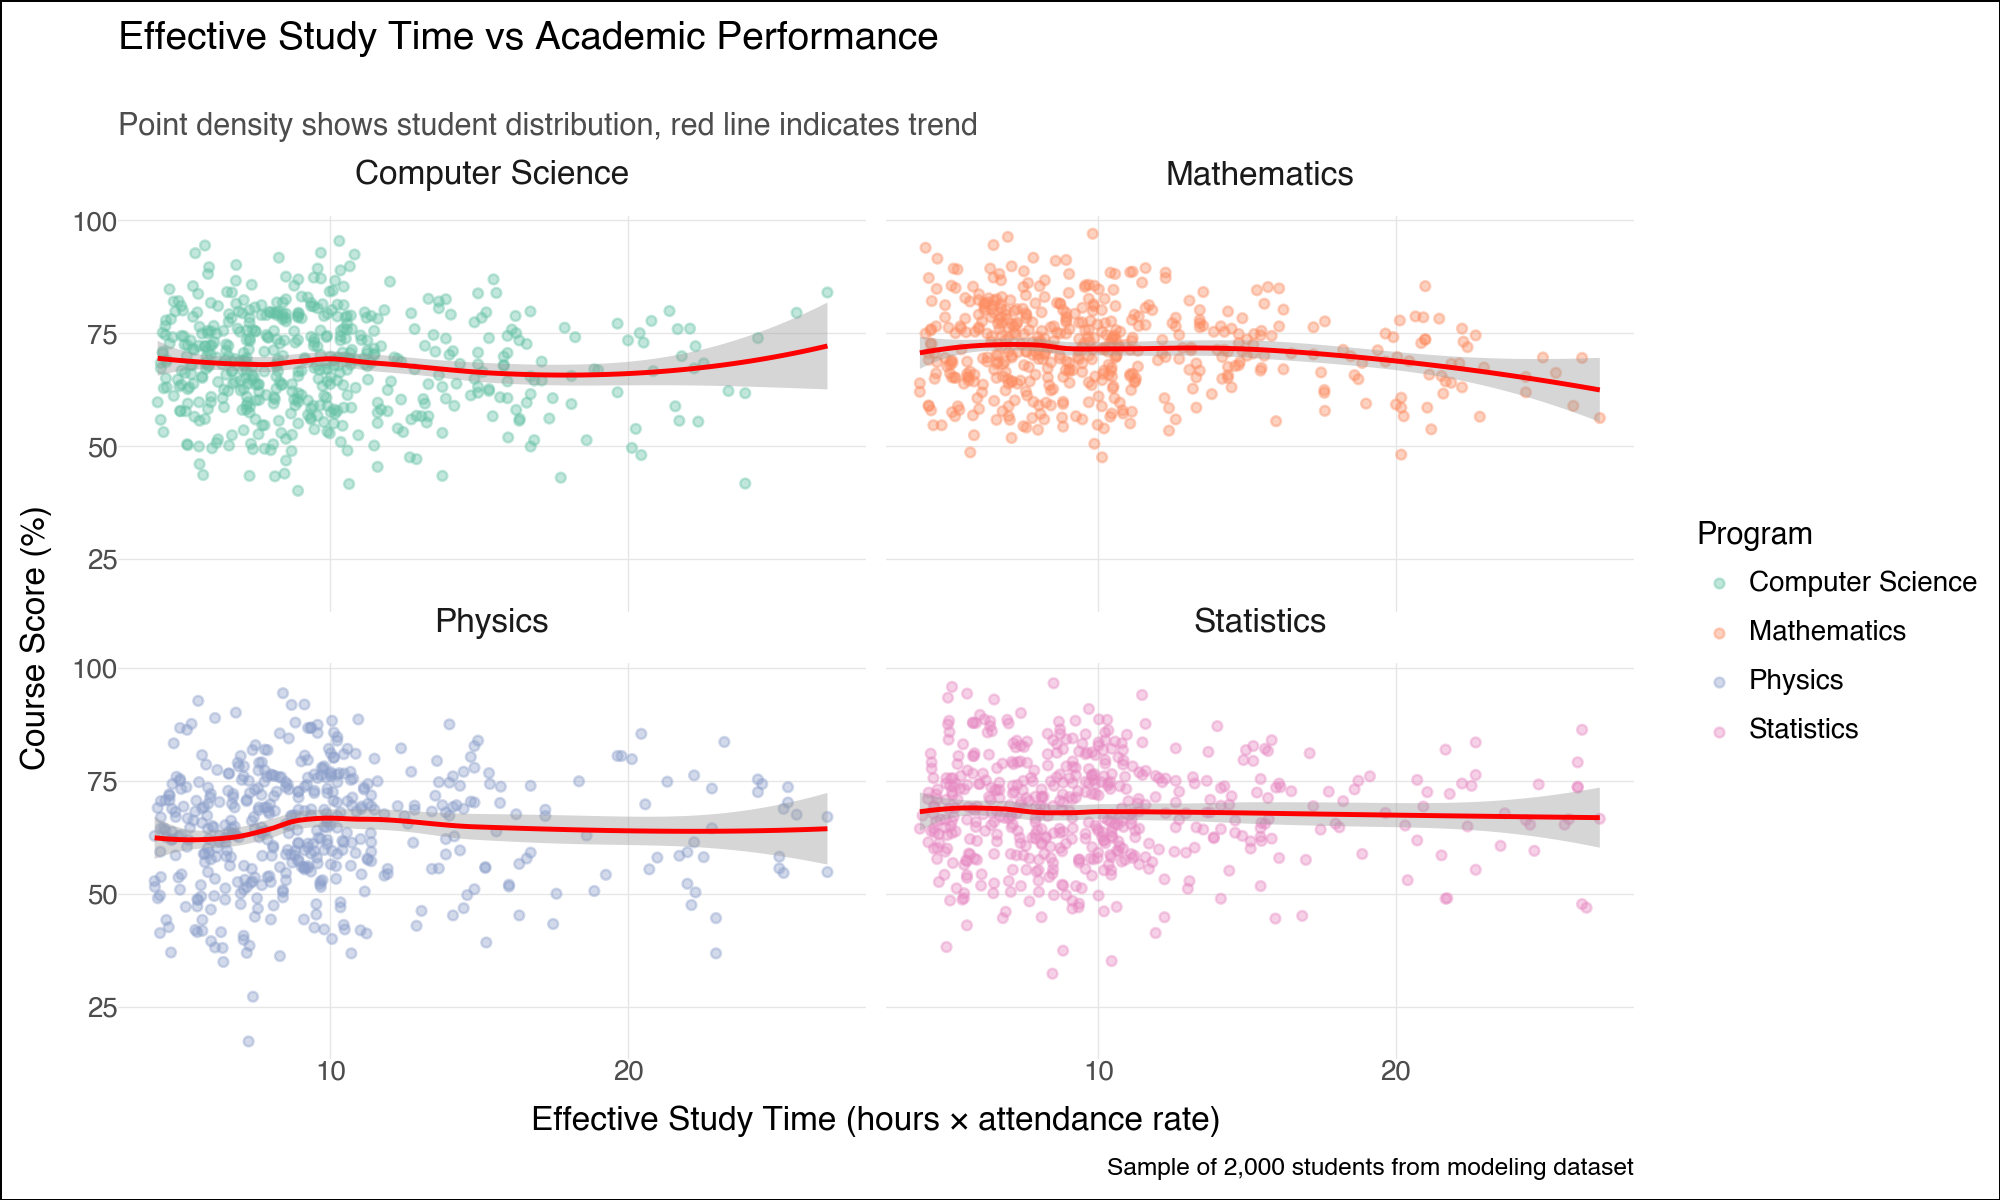

In [19]:
#| output: true

# 3. Final comprehensive visualization
final_plot_data = modeling_data.to_pandas()

# Configure plotnine for this plot
plotnine.options.figure_size = (12, 6)

p_final = (
    ggplot(final_plot_data.sample(2000), aes(x="effective_study_time", y="score")) +
    
    # Use points with alpha for density visualization
    geom_point(aes(color="program"), alpha=0.4, size=1.5) +
    
    # Overlay trend line
    geom_smooth(color="red", method="loess") +
    
    # Facet by program
    facet_wrap("program", ncol=2) +
    
    # Color scale for points
    scale_color_brewer(type="qual", palette="Set2", name="Program") +
    
    # Labels
    labs(
        title="Effective Study Time vs Academic Performance",
        subtitle="Point density shows student distribution, red line indicates trend",
        x="Effective Study Time (hours × attendance rate)",
        y="Course Score (%)",
        caption="Sample of 2,000 students from modeling dataset"
    ) +
    
    # Professional theme
    academic_theme +
    theme(
        strip_text=element_text(size=12, weight="bold"),
        legend_position="right"
    )
)

# Display the plot
display(p_final)
p_final